In [599]:
import pandas as pd 
import numpy as np
from snowflake.snowpark import Session
import snowflake.snowpark.functions as sfunc
import snowflake.snowpark.types as stypes
import plotly.graph_objects as go
import plotly.express as px
from IPython.display import Image as IPImage
import statsmodels.formula.api as smf
import itertools
from tqdm import tqdm
from plotly.subplots import make_subplots
from scipy import stats
import re


from config import SNOWFLAKE_USER, SNOWFLAKE_PASSWORD

connection_parameters = {
    "user": SNOWFLAKE_USER,
    "password": SNOWFLAKE_PASSWORD,
    "account": "pca67849",
    "warehouse": "WH_4_XS",
    "database": "TEMPORARY_DATA",
    "schema": "MBONE",
}
    
# session = Session.builder.configs(connection_parameters).create()


In [600]:
artificial_intelligence = [
    "ChatGPT",
    "Expert System",
    "IBM Watson",
    "IPSoft Amelia",
    "Ithink",
    "Virtual Agents",
    "Artificial Intelligence"
]

autonomous_driving = [
    "Autonomous Systems",
    "Lidar",
    "OpenCV",
    "Path Planning",
    "Remote Sensing"
]

natural_language_processing = [
    "ANTLR",
    "Automatic Speech Recognition (ASR)",
    "Chatbot",
    "Computational Linguistics",
    "Distinguo",
    "Latent Dirichlet Allocation",
    "Latent Semantic Analysis",
    "Lexalytics",
    "Lexical Acquisition",
    "Lexical Semantics",
    "Machine Translation (MT)",
    "Modular Audio Recognition Framework (MARF)",
    "MoSes",
    "Natural Language Processing",
    "Natural Language Toolkit (NLTK)",
    "Nearest Neighbour Algorithm",
    "OpenNLP",
    "Sentiment Analysis/Opinion Mining",
    "Speech Recognition",
    "Text Mining",
    "Text to Speech (TTS)",
    "Tokenization",
    "Word2Vec"
]

neural_networks = [
    "Caffe Deep Learning Framework",
    "Convolutional Neural Network (CNN)",
    "Deep Learning",
    "Deeplearning4j",
    "Keras",
    "Long Short-Term Memory (LSTM)",
    "MXNet",
    "Neural Networks",
    "Pybrain",
    "Recurrent Neural Network (RNN)",
    "TensorFlow"
]

machine_learning = [
    "AdaBoost algorithm",
    "Boosting (Machine Learning)",
    "Chi Square Automatic Interaction Detection (CHAID)",
    "Classification Algorithms",
    "Clustering Algorithms",
    "Decision Trees",
    "Dimensionality Reduction",
    "Google Cloud Machine Learning Platform",
    "Gradient boosting",
    "H2O (software)",
    "Libsvm",
    "Machine Learning",
    "Madlib",
    "Mahout",
    "Microsoft Cognitive Toolkit",
    "MLPACK (C++ library)",
    "Mlpy",
    "Random Forests",
    "Recommender Systems",
    "Scikit-learn",
    "Semi-Supervised Learning",
    "Supervised Learning (Machine Learning)",
    "Support Vector Machines (SVM)",
    "Semantic Driven Subtractive Clustering Method (SDSCM)",
    "Torch (Machine Learning)",
    "Unsupervised Learning",
    "Vowpal",
    "Xgboost"
]

robotics = [
    "Blue Prism",
    "Electromechanical Systems",
    "Motion Planning",
    "Motoman Robot Programming",
    "Robot Framework",
    "Robotic Systems",
    "Robot Operating System (ROS)",
    "Robot Programming",
    "Servo Drives/Motors",
    "Simultaneous Localization and Mapping (SLAM)"
]

visual_image_recognition = [
    "Computer Vision",
    "Image Processing",
    "Image Recognition",
    "Machine Vision",
    "Object Recognition"
]

all_ai_skills = artificial_intelligence + autonomous_driving + natural_language_processing + neural_networks + machine_learning + robotics + visual_image_recognition

In [601]:
air_quality_emissions = [
    "Air Permitting",
    "Air Pollution Control",
    "Air Quality",
    "Air Quality Control",
    "Air Sampling",
    "Atmospheric Dispersion Modeling",
    "Carbon Accounting",
    "Carbon Footprint Reduction",
    "Carbon Management",
    "Carbon Monoxide Detectors",
    "Continuous Emissions Monitoring Systems",
    "Emission Calculations",
    "Emission Reduction Projects",
    "Emission Standards",
    "Emission Testing",
    "Emissions Controls",
    "Emissions Inventory",
    "Fugitive Emissions",
    "Greenhouse Gas",
    "Low Carbon Solutions",
    "MACT Standards",
    "National Emissions Standards For Hazardous Air Pollutants",
    "Stack Emission Measurements",
    "Vapour Recovery"
]

clean_energy = [
    "Alternative Energy",
    "Alternative Fuels",
    "Biodiesel",
    "Biodiesel Production",
    "Biofuel Production",
    "Biofuels",
    "Biomass",
    "Clean Technology",
    "Geothermal Energy",
    "Geothermal Heating",
    "Methanol",
    "Renewable Energy",
    "Renewable Energy Development",
    "Renewable Energy Markets",
    "Renewable Energy Systems",
    "Renewable Fuels"
]

climate_change = [
    "Climate Analysis",
    "Climate Change Adaptation",
    "Climate Change Mitigation",
    "Climate Change Programs",
    "Climate Information",
    "Climate Modeling",
    "Climate Policy",
    "Climate Resilience",
    "Climate Variability And Change"
]

conservation = [
    "Conservation Biology",
    "Conservation Planning",
    "Environmental Impact Statements",
    "Environmental Literacy",
    "Environmental Protection",
    "Environmental Risk Assessment",
    "Environmentalism",
    "Fish Conservation",
    "Forest Conservation",
    "Habitat Conservation",
    "Habitat Conservation Plan",
    "Low Impact Development",
    "Marine Conservation",
    "Rainwater Harvesting",
    "Soil Conservation",
    "Soil Genesis",
    "Sustainability Planning",
    "Threatened And Endangered Species Surveys",
    "Water Conservation",
    "Watershed Management",
    "Wetland Conservation",
    "Wetland Delineation",
    "Wildlife Conservation",
    "Wildlife Monitoring"
]

energy_efficiency = [
    "Cooling Efficiency",
    "Energy Analysis",
    "Energy Conservation",
    "Energy Conservation Measures",
    "Energy Efficiency Analysis",
    "Energy Efficiency Assessment",
    "Energy Efficiency Improvement",
    "Energy Efficiency Research",
    "Energy Efficiency Services",
    "Energy Efficiency Technologies",
    "Energy Efficient Lighting",
    "Energy Efficient Operations",
    "Energy Modeling",
    "Energy Saving Products",
    "Energy-Efficient Buildings",
    "Heat Recovery Steam Generators",
    "Home Energy Assessment",
    "LED Lamps",
    "Renewable Portfolio Standard",
    "Residential Energy Conservation",
    "Residential Energy Efficiency"
]

energy_management = [
    "Advanced Distribution Automation",
    "Automatic Meter Reading",
    "Biomass Conversion",
    "Biorefinery",
    "Electric Meter",
    "Electric Utility",
    "Energy Analysis System",
    "Energy Audits",
    "Energy Consumption",
    "Energy Conversion",
    "Energy Demand Management",
    "Energy Forecasting",
    "Energy Management",
    "Energy Management Planning",
    "Energy Management Systems",
    "Energy Market",
    "Energy Policy",
    "Energy Production",
    "Energy Project Management",
    "Energy Supply",
    "Energy Transformation",
    "Energy Transport",
    "Flow Assurance",
    "Fuel Metering",
    "Gas Meter Systems",
    "Hydraulic Accumulators",
    "Leadership in Energy and Environmental Design (LEED) Rating System",
    "Load Shedding",
    "Meter Reading",
    "One-Line Diagram",
    "Power System Simulator For Engineering",
    "Public Utility",
    "Resource Distribution",
    "Smart Meter Installation",
    "Smart Meter Systems",
    "Sustainability Procedures",
    "Transmission System Operator",
    "Underground Utilities",
    "Utility Cooperative"
]

environmental_engineering = [
    "Biological Systems Engineering",
    "Bioremediation",
    "Ecological Engineering",
    "Environmental Analysis",
    "Environmental Contamination",
    "Environmental Economics",
    "Environmental Emergency",
    "Environmental Field Services",
    "Environmental Pollutants",
    "Environmental Problem Solving",
    "Environmental Program Management",
    "Environmental Remediation",
    "Environmental Technology",
    "Environmental Toxicology",
    "Geotextile",
    "Land Reclamation",
    "Landfill Design",
    "Oil Containment Booms",
    "Oil Skimmer",
    "Oil Spill Contingency Plans",
    "Pollution Control Systems",
    "Reforestation",
    "Remediation Systems",
    "Restoration Ecology",
    "Sanitary Engineering",
    "Sediment Controls",
    "Soil Contamination",
    "Stream Restoration",
    "Underground Storage Tanks (UST)",
    "Water Pollution",
    "Wetland Restoration"
]

environmental_regulation = [
    "Best Available Control Technology",
    "California Environmental Quality Act (CEQA)",
    "Categorical Exclusions",
    "Clean Water Act",
    "Comprehensive Environmental Response Compensation and Liability Act (CERCLA)",
    "Emergency Planning And Community Right-To-Know Act",
    "Endangered Species Act",
    "Environmental Auditing",
    "Environmental Compliance",
    "Environmental Compliance Assessment",
    "Environmental Due Diligence",
    "Environmental Laws",
    "Environmental Permitting",
    "Environmental Protocols",
    "EPA Regulations",
    "Federal Insecticide Fungicide And Rodenticide Act",
    "ISO 14000",
    "ISO 14000 Series",
    "ISO 14064",
    "Marine Mammal Protection Act",
    "Massachusetts Environmental Policy Act",
    "National Environmental Policy Act",
    "Natural Resources Law",
    "Pollution Regulations",
    "Resource Conservation And Recovery Act (RCRA)",
    "Restriction Of Hazardous Substances Directive",
    "Safe Drinking Water Act",
    "Spill Prevention Control And Countermeasure (SPCC)",
    "Total Maximum Daily Load",
    "Water Law",
    "Water Regulations Advisory Scheme"
]

nuclearn_energy = [
    "ANSI/ANS Standards",
    "Monte Carlo N-Particle Transport Codes",
    "Nuclear Core Design",
    "Nuclear Criticality Safety",
    "Nuclear Design",
    "Nuclear Fuel",
    "Nuclear Fuel Cycle",
    "Nuclear Instrumentation Module",
    "Nuclear Navy",
    "Nuclear Plant Design",
    "Nuclear Power",
    "Nuclear Reactor",
    "Nuclear Safety",
    "Nuclear Technology",
    "RELAP5-3D",
    "Roentgen",
    "Scintillator"
]

solar_energy = [
    "Commercial Solar Projects",
    "Concentrix Solar",
    "Passive Solar Building Design",
    "Photodetector",
    "Photovoltaic Systems",
    "Photovoltaics",
    "PVsyst",
    "Solar Application",
    "Solar Cell Manufacturing",
    "Solar Cells",
    "Solar Consulting",
    "Solar Design",
    "Solar Development",
    "Solar Energy",
    "Solar Energy Systems Installation",
    "Solar Engineering",
    "Solar Equipment",
    "Solar Inverter",
    "Solar Manufacturing",
    "Solar Panel Assembly",
    "Solar Panels",
    "Solar Photovoltaic Design",
    "Solar Products",
    "Solar Roofs",
    "Solar Systems",
    "Solar Thermal Installation",
    "Solar Thermal Systems",
    "Solar Water Heating"
]

waste_management = [
    "E-Waste",
    "Electrocoagulation",
    "Landfill",
    "Landfill Gas Collection",
    "Leachate Management",
    "Municipal Waste Management",
    "Plastic Recycling",
    "Recycling",
    "Sludge",
    "Sludge Disposal",
    "Solid Waste Management",
    "Tire Recycling",
    "Transfer Station",
    "Trash Pickup",
    "Waste Characterization",
    "Waste Collection",
    "Waste Disposal Systems",
    "Waste Management",
    "Waste Packaging",
    "Waste Removal",
    "Waste Sorting",
    "Waste Tracking System",
    "Waste Transport",
    "Waste Treatment",
    "Wastewater Treatment Plant Design"
]

water_energy = [
    "Dam Construction",
    "Hydraulic Structure",
    "Hydroelectricity",
    "Hydropower",
    "WaterCAD"
]

wind_energy = [
    "Wind Engineering",
    "Wind Farm Construction",
    "Wind Farm Design",
    "Wind Farm Development",
    "Wind Farming",
    "Wind Power",
    "Wind Turbine Maintenance",
    "Wind Turbine Technology",
    "Wind Turbines"
]

all_green_skills = air_quality_emissions + clean_energy + climate_change + conservation + energy_efficiency + energy_management + environmental_engineering + environmental_regulation + nuclearn_energy + solar_energy + waste_management + water_energy + wind_energy

In [602]:
# these are the samples used in the analysis
posts_df = session.read.table("OII_UK_10M_SAMP_POSTS")
skills_df = session.read.table("OII_UK_10M_SAMP_SKILLS")

# Review Skills Distributions

### AI

I would suggest that we don't put too much weight in the difference between the expert system, autonomous driving, etc. categories but rather treat AI skills as one group. I think these subgroups don't necessarily add anything to the core argument of the paper and can be misleading when demand for the top two are driven by general terms like "artificial intelligence" and "machine learning".

As an alternative, we could also use the "Artificial Intelligence and Machine Learning (AI/ML)" subcategory from Lightcast's skill taxonomy which has the advantage of being aligned with the data we're currently using and captures far more skills.

In [603]:
ai1_skill_counts_df = skills_df \
    .filter(sfunc.col("SKILL_NAME").isin(all_ai_skills)) \
    .group_by(["SKILL_NAME"]) \
    .agg(sfunc.count("ID").alias("CNT")) \
    .to_pandas()
    
ai1_skill_counts_df["PERC"] = ai1_skill_counts_df["CNT"] / ai1_skill_counts_df["CNT"].sum()
ai1_skill_counts_df.sort_values("PERC", ascending=False).head(10)

,SKILL_NAME,CNT,PERC
25,Machine Learning,44840,0.440818
0,Artificial Intelligence,35310,0.347129
23,Deep Learning,5241,0.051524
14,TensorFlow,3926,0.038596
27,Computer Vision,1796,0.017656
11,Chatbot,1717,0.016880
7,Robotic Systems,1278,0.012564
26,Text Mining,925,0.009094
15,Remote Sensing,787,0.007737
6,OpenCV,670,0.006587


In [604]:
missing = set(all_ai_skills) - set(ai1_skill_counts_df["SKILL_NAME"])
print(f"There are {len(missing)} skills of {len(all_ai_skills)} that don't appear in the  current Lightcast Taxonomy")

There are 58 skills of 89 that don't appear in the  current Lightcast Taxonomy


Lightcast's Skill Taxonomy is open source and regularly updated to reflect new skills. In particular, we can trace the current version of the skill taxonomy to version [9.17](https://docs.lightcast.dev/updates/skills-taxonomy-changelog) which helps reproducibility. 

In [605]:
ai2_skill_counts_df = skills_df \
    .filter(sfunc.col("SKILL_SUBCATEGORY_NAME") == 'Artificial Intelligence and Machine Learning (AI/ML)') \
    .group_by(["SKILL_NAME"]) \
    .agg(sfunc.count("ID").alias("CNT")) \
    .to_pandas()
    
ai2_skill_counts_df["PERC"] = ai2_skill_counts_df["CNT"] / ai2_skill_counts_df["CNT"].sum()
ai2_skill_counts_df.sort_values("PERC", ascending=False).head(10)

,SKILL_NAME,CNT,PERC
129,Machine Learning,44840,0.349004
0,Artificial Intelligence,35310,0.274829
115,Deep Learning,5241,0.040792
23,Generative Adversarial Networks,4516,0.035149
71,TensorFlow,3926,0.030557
72,Boosting,3096,0.024097
82,Machine Learning Algorithms,2459,0.019139
83,PyTorch (Machine Learning Library),2444,0.019022
130,Artificial Neural Networks,2252,0.017528
1,Scikit-Learn (Python Package),2164,0.016843


In [606]:
print(f"There are {len(ai2_skill_counts_df) / len(ai1_skill_counts_df):.2%} more AI/ML skills in the Lightcast category than what are captured by the ai skill list")

There are 506.45% more AI/ML skills in the Lightcast category than what are captured by the ai skill list


In [607]:
print("These are the top skills that are identified in the Lightcast Taxonomy that aren't in the original list")
ai2_skill_counts_df[
    ~ai2_skill_counts_df["SKILL_NAME"].isin(ai1_skill_counts_df["SKILL_NAME"])
].sort_values("PERC", ascending=False).head(10)

These are the top skills that are identified in the Lightcast Taxonomy that aren't in the original list


,SKILL_NAME,CNT,PERC
23,Generative Adversarial Networks,4516,0.035149
72,Boosting,3096,0.024097
82,Machine Learning Algorithms,2459,0.019139
83,PyTorch (Machine Learning Library),2444,0.019022
130,Artificial Neural Networks,2252,0.017528
1,Scikit-Learn (Python Package),2164,0.016843
40,Keras (Neural Network Library),1251,0.009737
19,MLOps (Machine Learning Operations),990,0.007705
4,Reinforcement Learning,946,0.007363
132,Intelligent Automation,873,0.006795


In [608]:
print("These are all the top skills that are in the original list but not in the Lightcast Subcategory")
ai1_skill_counts_df[
    ~ai1_skill_counts_df["SKILL_NAME"].isin(ai2_skill_counts_df["SKILL_NAME"])
].sort_values("PERC", ascending=False)

These are all the top skills that are in the original list but not in the Lightcast Subcategory


,SKILL_NAME,CNT,PERC
27,Computer Vision,1796,0.017656
7,Robotic Systems,1278,0.012564
26,Text Mining,925,0.009094
15,Remote Sensing,787,0.007737
17,Machine Vision,670,0.006587
4,Speech Recognition,597,0.005869
21,Robot Framework,421,0.004139
5,Motion Planning,297,0.002920
2,Image Recognition,220,0.002163
16,Computational Linguistics,209,0.002055


### Green

There are no "green" subcategories to use in the Lightcast taxonomy so it's probably best to stick with the current list. It is a bit outdated due to changes in the Lightcast taxonomy but over 90% of the original list exists in our data so I feel good about sticking to this list.

In [609]:
green_skill_counts_df = skills_df \
    .filter(sfunc.col("SKILL_NAME").isin(all_green_skills)) \
    .group_by(["SKILL_NAME"]) \
    .agg(sfunc.count("ID").alias("CNT")) \
    .to_pandas()
    
green_skill_counts_df["PERC"] = green_skill_counts_df["CNT"] / green_skill_counts_df["CNT"].sum()
green_skill_counts_df.sort_values("PERC", ascending=False).head(10)

,SKILL_NAME,CNT,PERC
110,Waste Management,21357,0.141645
224,Renewable Energy,14009,0.092911
83,ISO 14000 Series,13503,0.089556
111,Environmental Laws,8545,0.056673
143,Smart Meter Systems,6972,0.046240
186,Environmental Protocols,4205,0.027889
228,Waste Collection,3778,0.025057
58,Meter Reading,3752,0.024884
187,Energy Management,3713,0.024626
226,Nuclear Power,3243,0.021508


In [610]:
f"{len(green_skill_counts_df) / len(all_green_skills):.2%} of the green skills are in the current Lightcast Taxonomy"

'92.11% of the green skills are in the current Lightcast Taxonomy'

In [611]:
missing = set(all_green_skills) - set(green_skill_counts_df["SKILL_NAME"])
print(f"There are {len(missing)} skills that don't appear in the Lightcast Taxonomy")
missing

There are 22 skills that don't appear in the Lightcast Taxonomy


{'Clean Technology',
 'Electric Meter',
 'Energy Analysis System',
 'Environmental Literacy',
 'Geotextile',
 'Habitat Conservation Plan',
 'ISO 14000',
 'Marine Mammal Protection Act',
 'Massachusetts Environmental Policy Act',
 'Nuclear Navy',
 'Oil Containment Booms',
 'Oil Skimmer',
 'Renewable Portfolio Standard',
 'Residential Energy Efficiency',
 'Restriction Of Hazardous Substances Directive',
 'Scintillator',
 'Soil Genesis',
 'Threatened And Endangered Species Surveys',
 'Tire Recycling',
 'Total Maximum Daily Load',
 'Utility Cooperative',
 'Vapour Recovery'}

# Preparing Postings Data

In [612]:
total_posts_df = posts_df \
    .select(sfunc.year("POSTED").alias("YEAR"), sfunc.quarter("POSTED").alias("QUARTER")) \
    .group_by(["YEAR", "QUARTER"]).count().order_by(["YEAR", "QUARTER"])
    
ai_ids = posts_df \
    .join(skills_df, posts_df["ID"] == skills_df["ID"]) \
    .filter(skills_df["SKILL_SUBCATEGORY_NAME"] == 'Artificial Intelligence and Machine Learning (AI/ML)') \
    .select(posts_df["ID"].alias("ID"))
    
#.filter(skills_df["SKILL_SUBCATEGORY_NAME"].isin(all_ai_skills)) \
    
green_ids = posts_df \
    .join(skills_df, posts_df["ID"] == skills_df["ID"]) \
    .filter(skills_df["SKILL_NAME"].isin(all_green_skills)) \
    .select(posts_df["ID"].alias("ID"))
    
ai_posts_df = posts_df \
    .filter(sfunc.col("ID").isin(ai_ids))

green_posts_df = posts_df \
    .filter(sfunc.col("ID").isin(green_ids))
    
other_posts_df = posts_df \
    .filter(~sfunc.col("ID").isin(ai_ids) & ~sfunc.col("ID").isin(green_ids))

In [613]:
n_req_skills = 2

ai_req_ids = ai_posts_df \
    .join(skills_df, ai_posts_df["ID"] == skills_df["ID"]) \
    .filter(skills_df["SKILL_SUBCATEGORY_NAME"] == 'Artificial Intelligence and Machine Learning (AI/ML)') \
    .group_by(ai_posts_df["ID"]) \
    .agg(sfunc.count(ai_posts_df["ID"]).alias("CNT")) \
    .filter(sfunc.col("CNT") >= n_req_skills) \
    .select(ai_posts_df["ID"].alias("ID"))
        
green_req_ids = green_posts_df \
    .join(skills_df, green_posts_df["ID"] == skills_df["ID"]) \
    .filter(skills_df["SKILL_NAME"].isin(all_green_skills)) \
    .group_by(green_posts_df["ID"]) \
    .agg(sfunc.count(green_posts_df["ID"]).alias("CNT")) \
    .filter(sfunc.col("CNT") >= n_req_skills) \
    .select(green_posts_df["ID"].alias("ID"))
        
ai_req_posts_df = ai_posts_df \
    .filter(sfunc.col("ID").isin(ai_req_ids)) \
    
green_req_posts_df = green_posts_df \
    .filter(sfunc.col("ID").isin(green_req_ids)) \
    
other_req_posts_df = other_posts_df \
    .filter(~sfunc.col("ID").isin(ai_req_ids) & ~sfunc.col("ID").isin(green_req_ids))
    
ai_req_ratio = len(ai_req_posts_df.to_pandas()) / len(ai_posts_df.to_pandas())
print(f"{ai_req_ratio:.2%} of AI/ML posts have {n_req_skills} required AI/ML skills")
green_req_ratio = len(green_req_posts_df.to_pandas()) / len(green_posts_df.to_pandas())
print(f"{green_req_ratio:.2%} of green posts have {n_req_skills} required green skills")

# ai_posts_df = ai_req_posts_df
# green_posts_df = green_req_posts_df
# other_posts_df = other_req_posts_df

30.90% of AI/ML posts have 2 required AI/ML skills
16.52% of green posts have 2 required green skills


In [614]:
# creating consistent color groups for the different categories
edu_levels = ["PhD Equivalent", "Master", "Bachelor", "HNC/HND", "No Degree"]
color_positions = np.linspace(0, 1, len(edu_levels))
sampled_colors = px.colors.sample_colorscale(px.colors.sequential.Plasma, color_positions)
educ_colors = {subgroup: color for subgroup, color in zip(edu_levels, sampled_colors)}
edu_levels.reverse()

group_colors = {"Green": "green", "AI/ML": "blue", "Other": "grey"}

### Company-level AI Mentions Robustness Test

This section removes any companies with >50% of their postings requiring AI skills. This is because it's a possibility that Lightcast's skill extraction identifies AI mentions that are describing the company rather than being relevant to the actual job description. This can happen, for instance, when an AI company is hiring for non-AI roles and they describe their work on  "Generative Artifical Intelligence" in their company description of the post.

In [615]:
# identify companies with > 50% of their posts having an AI or Green skill requirement to filter out 
# potential false positives due to AI or Green company descriptions in the job post

# comp_ai_df = ai_posts_df \
#     .filter(sfunc.col("COMPANY").is_not_null()) \
#     .group_by("COMPANY") \
#     .agg(sfunc.count("ID").alias("AI_CNT"))
    
# comp_green_df = green_posts_df \
#     .filter(sfunc.col("COMPANY").is_not_null()) \
#     .group_by("COMPANY") \
#     .agg(sfunc.count("ID").alias("GREEN_CNT"))
    
# comp_df = posts_df \
#     .filter(sfunc.col("COMPANY").is_not_null()) \
#     .group_by("COMPANY") \
#     .agg(sfunc.count("ID").alias("CNT"))
    
# comp_ai_df = comp_df \
#     .join(comp_ai_df, comp_df["COMPANY"] == comp_ai_df["COMPANY"], "outer") \
#     .select(sfunc.coalesce(comp_ai_df["COMPANY"], comp_df["COMPANY"]).alias("COMPANY"), comp_ai_df["AI_CNT"], comp_df["CNT"]) \
#     .to_pandas()
    
# comp_green_df = comp_df \
#     .join(comp_green_df, comp_df["COMPANY"] == comp_green_df["COMPANY"], "outer") \
#     .select(sfunc.coalesce(comp_green_df["COMPANY"], comp_df["COMPANY"]).alias("COMPANY"), comp_green_df["GREEN_CNT"], comp_df["CNT"]) \
#     .to_pandas()
    
# threshold = .14
# comp_ai_df = comp_ai_df[comp_ai_df["AI_CNT"] > comp_ai_df["CNT"] * threshold]
# comp_green_df = comp_green_df[comp_green_df["GREEN_CNT"] > comp_green_df["CNT"] * threshold]

# print(f"There are {len(comp_ai_df)} companies with > 50% AI/ML posts, representing {comp_ai_df['CNT'].sum()} posts")
# print(f"There are {len(comp_green_df)} companies with > 50% Green posts, representing {comp_green_df['CNT'].sum()} posts")

# ai_posts_df = ai_posts_df \
#     .filter(~sfunc.col("COMPANY").isin(comp_ai_df["COMPANY"].values.tolist()))
    
# green_posts_df = green_posts_df \
#     .filter(~sfunc.col("COMPANY").isin(comp_green_df["COMPANY"].values.tolist()))
    
# other_posts_df = other_posts_df \
#     .filter(
#         (~sfunc.col("COMPANY").isin(comp_ai_df["COMPANY"].values.tolist())) & 
#         (~sfunc.col("COMPANY").isin(comp_green_df["COMPANY"].values.tolist()))
#     )

# Main Figures

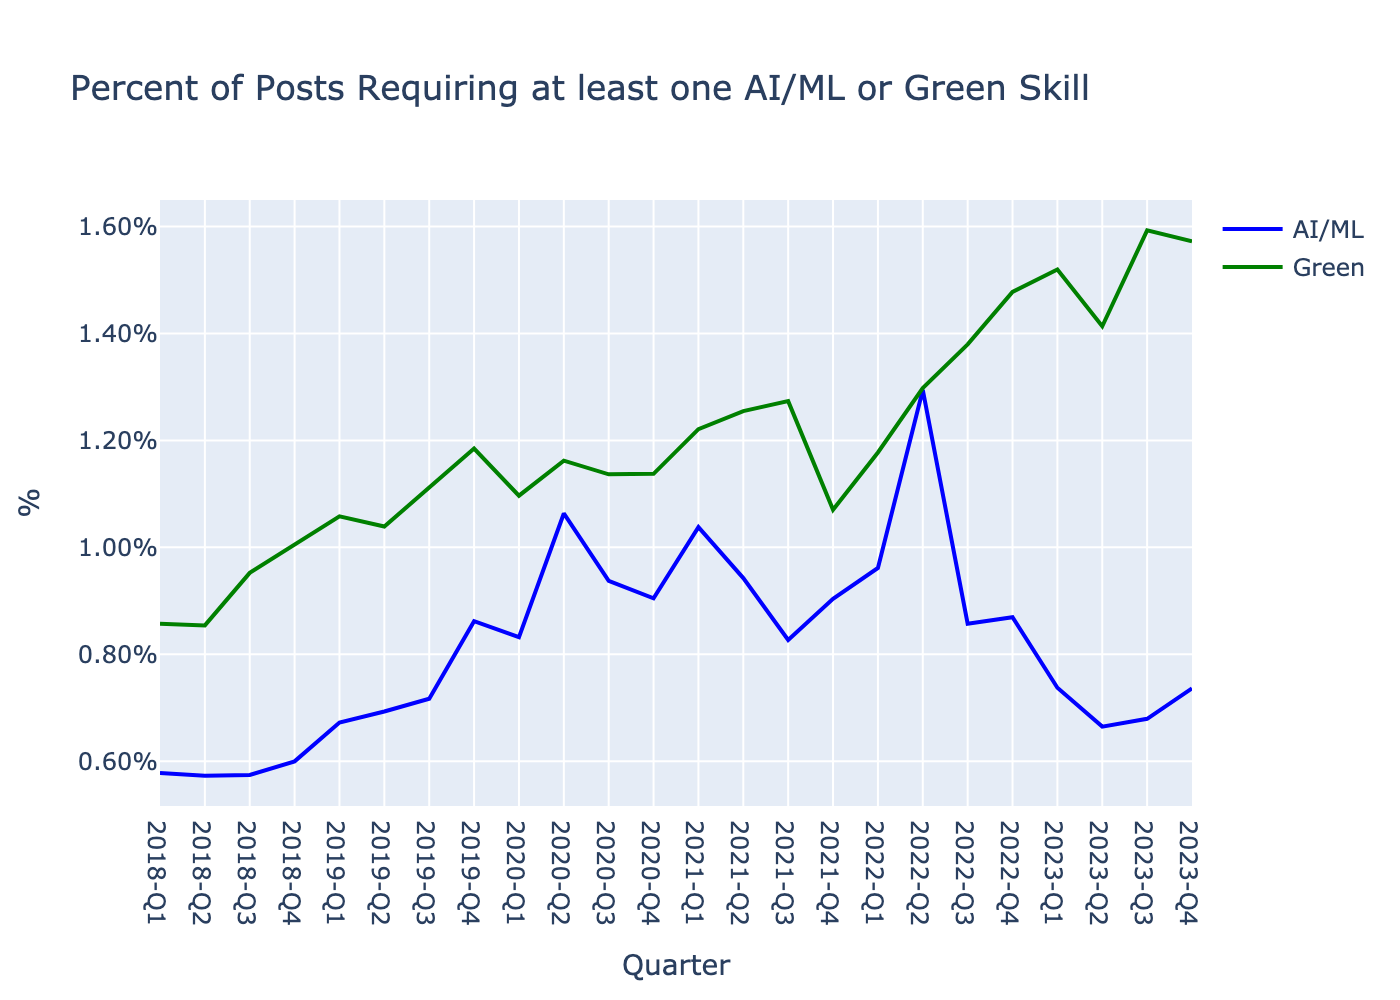

In [674]:
def get_post_ratios(posts_df, skills_df, total_df):
    
    post_skill_df = posts_df \
        .join(skills_df, posts_df["ID"] == skills_df["ID"]) \
        .select(sfunc.year("POSTED").alias("YEAR"), sfunc.quarter("POSTED").alias("QUARTER"), posts_df["ID"]) \
        .group_by(["YEAR", "QUARTER"]) \
        .agg(sfunc.count_distinct(posts_df["ID"]).alias("SKILL_COUNT"))
        
    skill_ratio_df = total_df \
        .join(post_skill_df, ["YEAR", "QUARTER"], "left") \
        .select(sfunc.concat("YEAR", sfunc.concat(sfunc.lit("-Q"), "QUARTER")).alias("QUARTER"), "SKILL_COUNT", "COUNT", (sfunc.col("SKILL_COUNT") / sfunc.col("COUNT")).alias("SKILL_RATIO")) \
        .to_pandas()
        
    return skill_ratio_df
        
def display_ratios(dataframes, names, title, file_name, group_colors):
    
    fig = go.Figure()
    
    for i, df in enumerate(dataframes):
        fig.add_trace(
            go.Scatter(
                x=df["QUARTER"], 
                y=df["SKILL_RATIO"], 
                mode='lines', 
                name=names[i],
                marker_color = group_colors[names[i]]
            )
        )
        
    fig.update_layout(
        title=title, 
        xaxis_title='Quarter', 
        yaxis_title='%', 
        width=700, height=500,
        yaxis=dict(tickformat='.2%')
    )
    
    with open(f"figures/{file_name}.png", "wb") as f:
        f.write(fig.to_image(format="png", engine="kaleido", scale=2))
    
    display(IPImage(filename=f"figures/{file_name}.png", width=600, height=500))
    
ai_ratio_df = get_post_ratios(ai_posts_df, skills_df, total_posts_df)
green_ratio_df = get_post_ratios(green_posts_df, skills_df, total_posts_df)

display_ratios([ai_ratio_df, green_ratio_df], ["AI/ML", "Green"], "Percent of Posts Requiring at least one AI/ML or Green Skill", "post_ratios", group_colors) 

This runs counter to the original version of this chart which shows AI postings increasingly regularly throughout the period. However, the dip in AI-related job postings aligns with internal reporting from [Lightcast](https://lightcast.io/resources/blog/on-the-job-ai-postings) and the tech layoff period between 2022-2023 which has been well-documented.

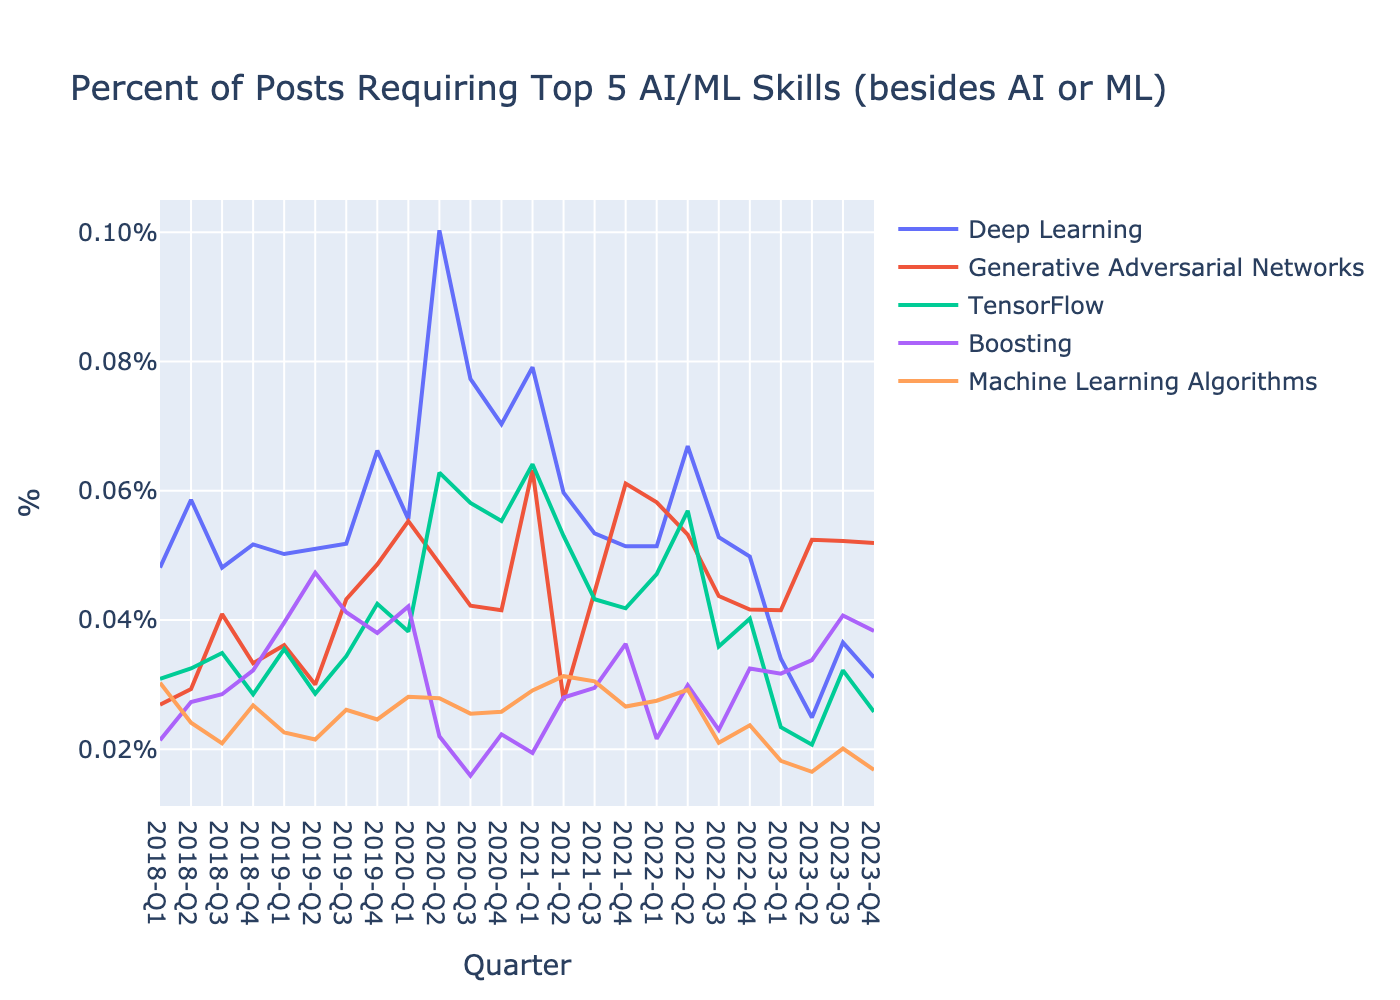

In [617]:
top_ai_skills = [
    "Deep Learning",
    "Generative Adversarial Networks",
    "TensorFlow",
    "Boosting",
    "Machine Learning Algorithms",
]

top_ai_skill_dfs = [skills_df[skills_df["SKILL_NAME"] == skill] for skill in top_ai_skills]
top_ai_skill_ratio_dfs = [get_post_ratios(ai_posts_df, tp_df, total_posts_df) for tp_df in top_ai_skill_dfs]

sampled_colors = itertools.cycle(px.colors.qualitative.Plotly)
top_ai_colors = {subgroup: color for subgroup, color in zip(top_ai_skills, sampled_colors)}

display_ratios(
    top_ai_skill_ratio_dfs, 
    top_ai_skills, 
    "Percent of Posts Requiring Top 5 AI/ML Skills (besides AI or ML)", 
    "top_ai_skill_ratios", 
    top_ai_colors
)

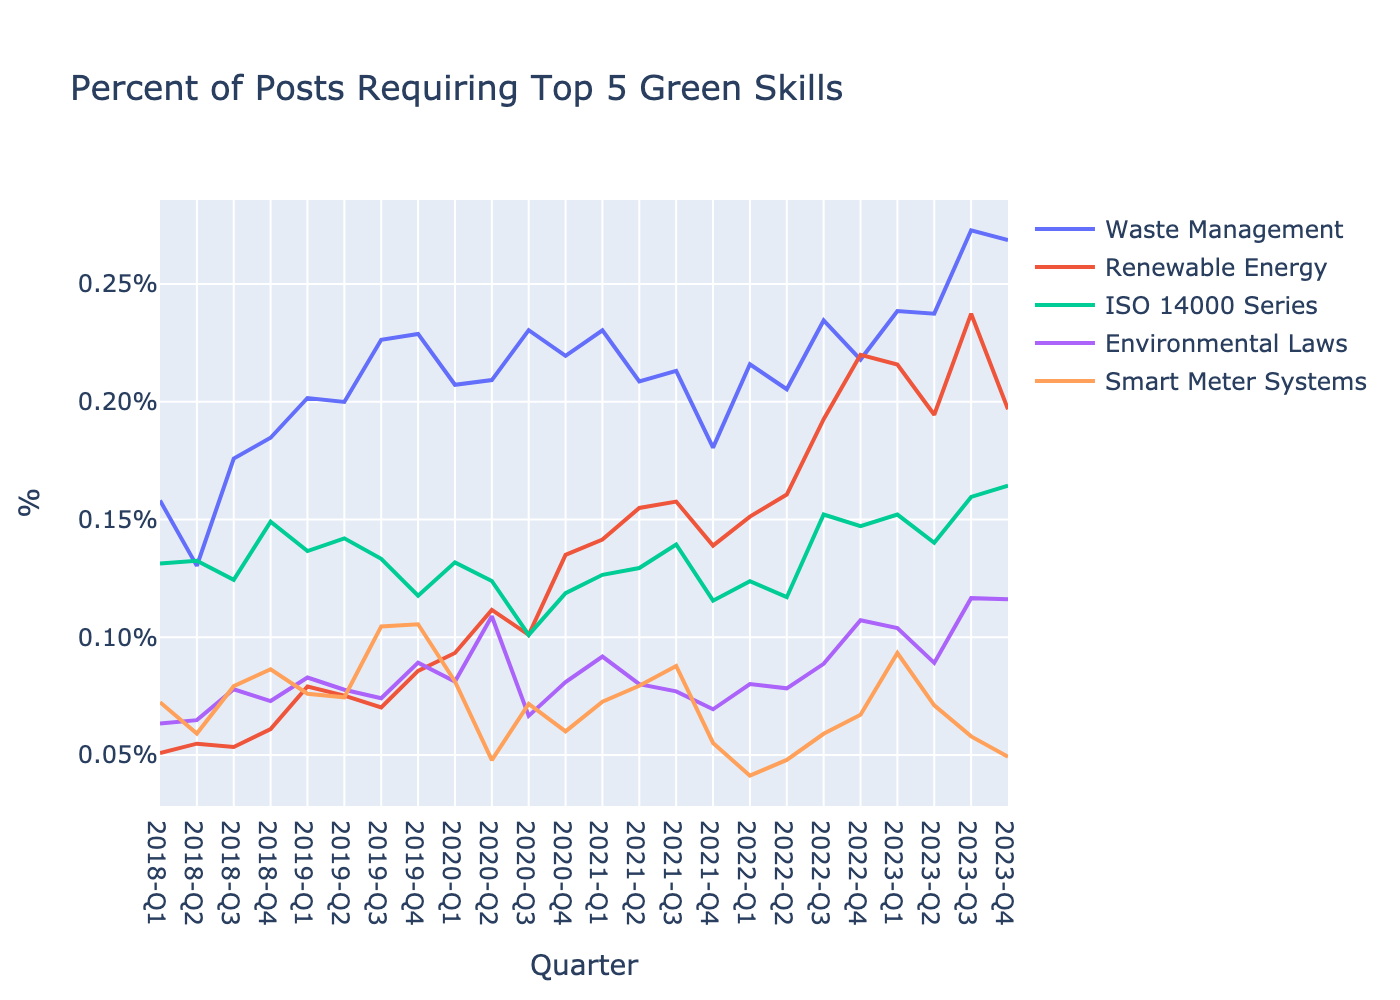

In [618]:
top_green_skills = [
    "Waste Management",
    "Renewable Energy",
    "ISO 14000 Series",
    "Environmental Laws",
    "Smart Meter Systems"
]

top_green_skill_dfs = [skills_df[skills_df["SKILL_NAME"] == skill] for skill in top_green_skills]
top_green_kill_ratio_dfs = [get_post_ratios(green_posts_df, tp_df, total_posts_df) for tp_df in top_green_skill_dfs]

sampled_colors = itertools.cycle(px.colors.qualitative.Plotly)
top_green_colors = {subgroup: color for subgroup, color in zip(top_green_skills, sampled_colors)}

display_ratios(
    top_green_kill_ratio_dfs, 
    top_green_skills, 
    "Percent of Posts Requiring Top 5 Green Skills", 
    "top_green_skill_ratios", 
    top_green_colors
)

# Education Trends

In [619]:
other_educ_df = other_posts_df \
    .join(skills_df, other_posts_df["ID"] == skills_df["ID"]) \
    .select(sfunc.year("POSTED").alias("YEAR"), sfunc.quarter("POSTED").alias("QUARTER"), other_posts_df["EDULEVELS_NAME_MIN"], other_posts_df["ID"]) \
    .group_by(["YEAR", "QUARTER", "EDULEVELS_NAME_MIN"]) \
    .agg(sfunc.count_distinct(other_posts_df["ID"]).alias("CNT")) \
    .select(sfunc.concat("YEAR", sfunc.concat(sfunc.lit("-Q"), "QUARTER")).alias("QUARTER"), "EDULEVELS_NAME_MIN", sfunc.cast("CNT", stypes.FloatType()).alias("CNT")) \
    .order_by("QUARTER") \
    .to_pandas()

ai_educ_df = ai_posts_df \
    .join(skills_df, ai_posts_df["ID"] == skills_df["ID"]) \
    .select(sfunc.year("POSTED").alias("YEAR"), sfunc.quarter("POSTED").alias("QUARTER"), ai_posts_df["EDULEVELS_NAME_MIN"], ai_posts_df["ID"]) \
    .group_by(["YEAR", "QUARTER", "EDULEVELS_NAME_MIN"]) \
    .agg(sfunc.count_distinct(ai_posts_df["ID"]).alias("CNT")) \
    .select(sfunc.concat("YEAR", sfunc.concat(sfunc.lit("-Q"), "QUARTER")).alias("QUARTER"), "EDULEVELS_NAME_MIN", sfunc.cast("CNT", stypes.FloatType()).alias("CNT")) \
    .order_by("QUARTER") \
    .to_pandas()
    
green_educ_df = green_posts_df \
    .join(skills_df, green_posts_df["ID"] == skills_df["ID"]) \
    .select(sfunc.year("POSTED").alias("YEAR"), sfunc.quarter("POSTED").alias("QUARTER"), green_posts_df["EDULEVELS_NAME_MIN"], green_posts_df["ID"]) \
    .group_by(["YEAR", "QUARTER", "EDULEVELS_NAME_MIN"]) \
    .agg(sfunc.count_distinct(green_posts_df["ID"]).alias("CNT")) \
    .select(sfunc.concat("YEAR", sfunc.concat(sfunc.lit("-Q"), "QUARTER")).alias("QUARTER"), "EDULEVELS_NAME_MIN", sfunc.cast("CNT", stypes.FloatType()).alias("CNT")) \
    .order_by("QUARTER") \
    .to_pandas()
    
other_pivot_df = other_educ_df.pivot(index="QUARTER", columns="EDULEVELS_NAME_MIN", values="CNT").fillna(0).reset_index()
other_pivot_df.iloc[:, 1:] = other_pivot_df.iloc[:, 1:].div(other_pivot_df.iloc[:, 1:].sum(axis=1), axis=0)
other_pivot_df = other_pivot_df[["QUARTER", "Ph.D. or equivalent", "Master's or equivalent", "Bachelor's or equivalent", "Foundation/HNC/HND or equivalent"]]
other_pivot_df.columns = ["QUARTER", "PhD Equivalent", "Master", "Bachelor", "HNC/HND"]

ai_pivot_df = ai_educ_df.pivot(index="QUARTER", columns="EDULEVELS_NAME_MIN", values="CNT").fillna(0).reset_index()    
ai_pivot_df.iloc[:, 1:] = ai_pivot_df.iloc[:, 1:].div(ai_pivot_df.iloc[:, 1:].sum(axis=1), axis=0)
ai_pivot_df = ai_pivot_df[["QUARTER", "Ph.D. or equivalent", "Master's or equivalent", "Bachelor's or equivalent", "Foundation/HNC/HND or equivalent"]]
ai_pivot_df.columns = ["QUARTER", "PhD Equivalent", "Master", "Bachelor", "HNC/HND"]

green_pivot_df = green_educ_df.pivot(index="QUARTER", columns="EDULEVELS_NAME_MIN", values="CNT").fillna(0).reset_index()  
green_pivot_df.iloc[:, 1:] = green_pivot_df.iloc[:, 1:].div(green_pivot_df.iloc[:, 1:].sum(axis=1), axis=0) 
green_pivot_df = green_pivot_df[["QUARTER", "Ph.D. or equivalent", "Master's or equivalent", "Bachelor's or equivalent", "Foundation/HNC/HND or equivalent"]]   
green_pivot_df.columns = ["QUARTER", "PhD Equivalent", "Master", "Bachelor", "HNC/HND"]

education_df = pd.concat([ai_pivot_df, green_pivot_df, other_pivot_df], keys=["AI/ML", "Green", "Other"]).reset_index(level=0, names=["GROUP"])

In [620]:
education_df["GROUP"].unique().tolist()

['AI/ML', 'Green', 'Other']

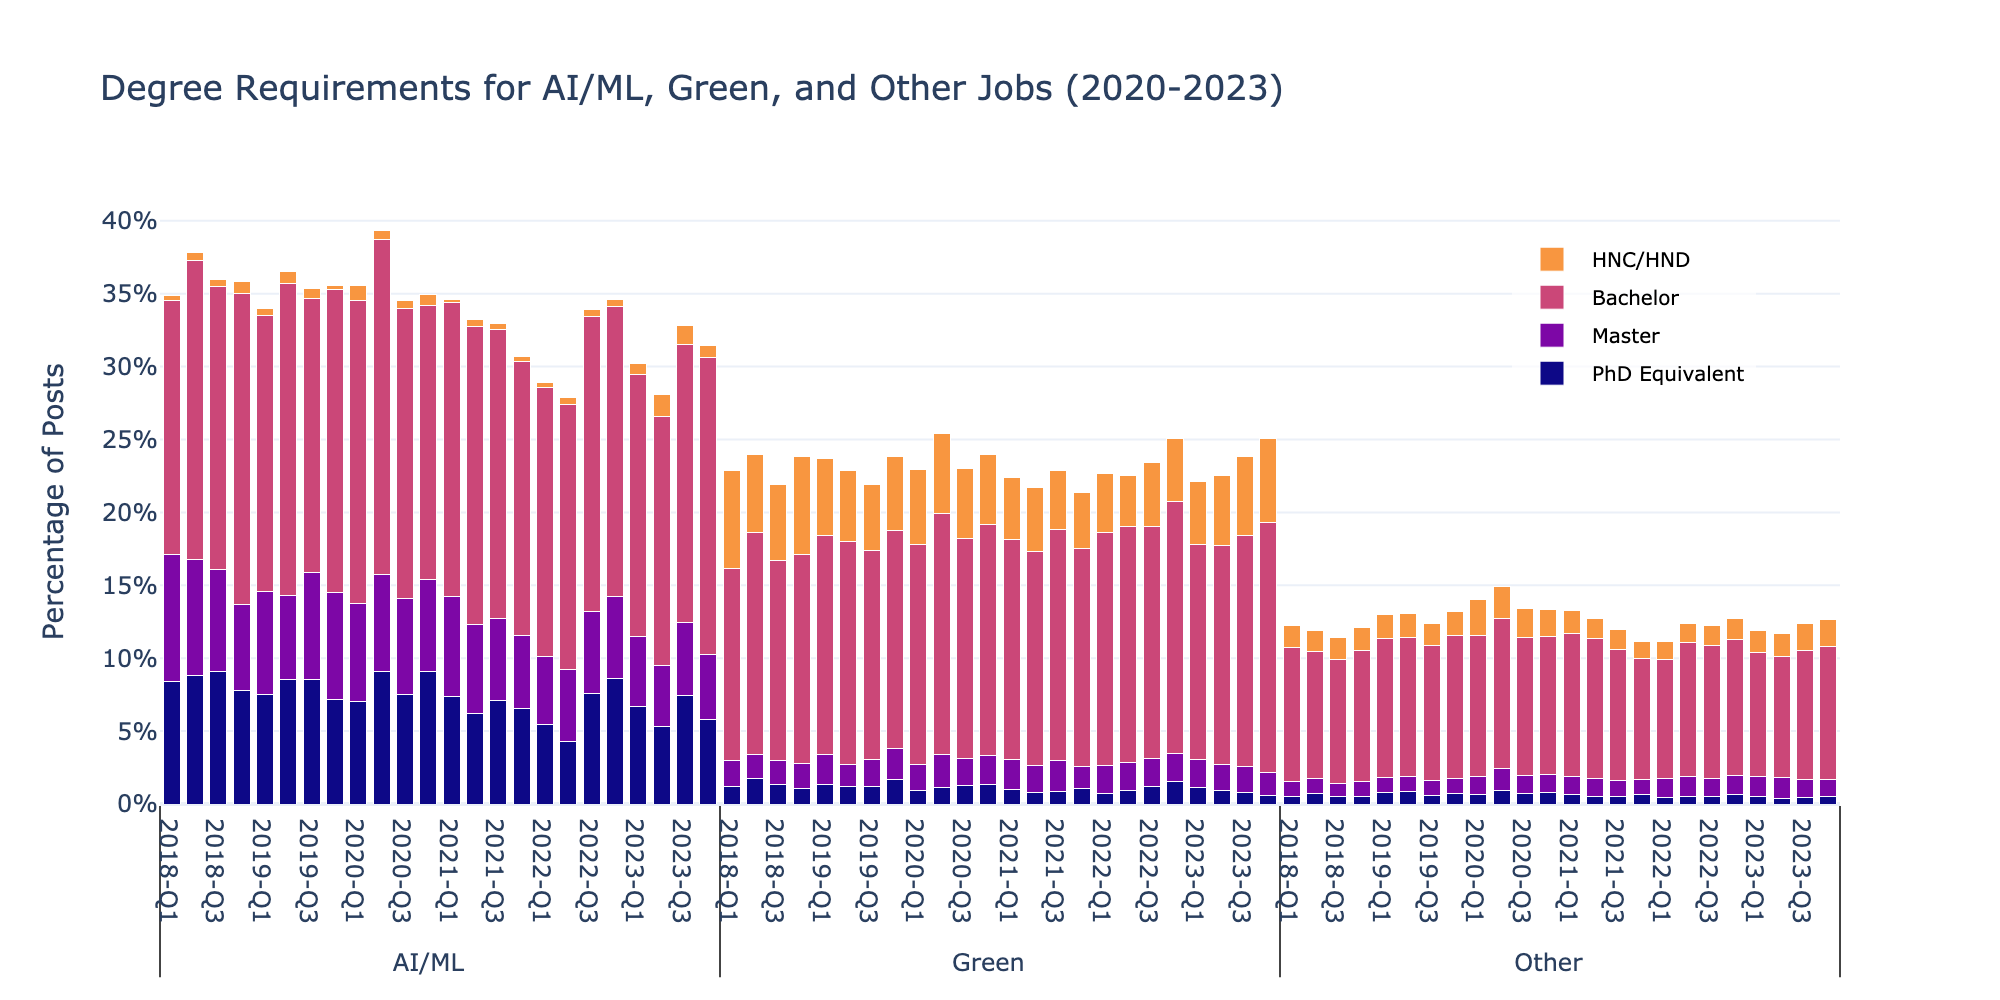

In [621]:
def display_education_dist(df, title, file_name, educ_colors):
    
    fig = go.Figure()
    
    quarters = df["QUARTER"].unique().tolist()
    groups = df["GROUP"].unique().tolist()
    subgroups = df.columns[2:].tolist()
    
    for q in quarters:
        for s in subgroups:
            
            label_groups = [groups, [q] * len(groups)] 
            
            fig.add_trace(
                go.Bar(
                    name = s if q == quarters[0] else None,
                    x = label_groups,
                    y = df[df['QUARTER'] == q][s],
                    offsetgroup = q,
                    marker_color = educ_colors[s],
                    showlegend=True if q == quarters[0] else False
                )
            )
            
    fig.update_layout(
        title=title,
        barmode='stack',
        template='plotly_white',   
        showlegend=True,
        bargap=0.2,  
        bargroupgap=0.1,
        width=1000, height=500,
        legend=dict(
            x=0.95,                # Horizontal position (0 = left, 1 = right)
            y=0.95,                # Vertical position (0 = bottom, 1 = top)
            xanchor='right',       # Anchor the x position to the right of the legend box
            yanchor='top',         # Anchor the y position to the top of the legend box
            bgcolor='rgba(255, 255, 255, 0.7)',  # Semi-transparent white background
            bordercolor='rgba(0, 0, 0, 0)',      # No border
            font=dict(
                size=10,
                color='black'
            )
        ),
        yaxis=dict(
            tickformat='.0%',
            title='Percentage of Posts'
        ),
    )
            
    with open(f"figures/{file_name}.png", "wb") as f:
        f.write(fig.to_image(format="png", engine="kaleido", scale=2))
        
    display(IPImage(filename=f"figures/{file_name}.png", width=800, height=500))
    
display_education_dist(education_df, "Degree Requirements for AI/ML, Green, and Other Jobs (2020-2023)", "education_dist", educ_colors)

# Skill Trends

In [622]:
other_skill_int_df = other_posts_df \
    .join(skills_df, other_posts_df["ID"] == skills_df["ID"]) \
    .select(other_posts_df["ID"], sfunc.year(other_posts_df["POSTED"]).alias("YEAR"), sfunc.quarter("POSTED").alias("QUARTER")) \
    .group_by([other_posts_df["ID"], "YEAR", "QUARTER"]) \
    .agg(sfunc.count(other_posts_df["ID"]).alias("SKILL_COUNT")) \
    .select(sfunc.concat("YEAR", sfunc.concat(sfunc.lit("-Q"), "QUARTER")).alias("QUARTER"), "SKILL_COUNT") \
    .group_by("QUARTER") \
    .agg(sfunc.mean("SKILL_COUNT").alias("SKILL_COUNT")) \
    .to_pandas()
    
ai_skill_int_df = ai_posts_df \
    .join(skills_df, ai_posts_df["ID"] == skills_df["ID"]) \
    .select(ai_posts_df["ID"], sfunc.year(ai_posts_df["POSTED"]).alias("YEAR"), sfunc.quarter("POSTED").alias("QUARTER")) \
    .group_by([ai_posts_df["ID"], "YEAR", "QUARTER"]) \
    .agg(sfunc.count(ai_posts_df["ID"]).alias("SKILL_COUNT")) \
    .select(sfunc.concat("YEAR", sfunc.concat(sfunc.lit("-Q"), "QUARTER")).alias("QUARTER"), "SKILL_COUNT") \
    .group_by("QUARTER") \
    .agg(sfunc.mean("SKILL_COUNT").alias("SKILL_COUNT")) \
    .to_pandas()
    
green_skill_int_df = green_posts_df \
    .join(skills_df, green_posts_df["ID"] == skills_df["ID"]) \
    .select(green_posts_df["ID"], sfunc.year(green_posts_df["POSTED"]).alias("YEAR"), sfunc.quarter("POSTED").alias("QUARTER")) \
    .group_by([green_posts_df["ID"], "YEAR", "QUARTER"]) \
    .agg(sfunc.count(green_posts_df["ID"]).alias("SKILL_COUNT")) \
    .select(sfunc.concat("YEAR", sfunc.concat(sfunc.lit("-Q"), "QUARTER")).alias("QUARTER"), "SKILL_COUNT") \
    .group_by("QUARTER") \
    .agg(sfunc.mean("SKILL_COUNT").alias("SKILL_COUNT")) \
    .to_pandas()
    
skill_int_df = pd.concat([ai_skill_int_df, green_skill_int_df, other_skill_int_df], keys=["AI/ML", "Green", "Other"]).reset_index(level=0, names=["GROUP"])
skill_int_df.sort_values("QUARTER", inplace=True)

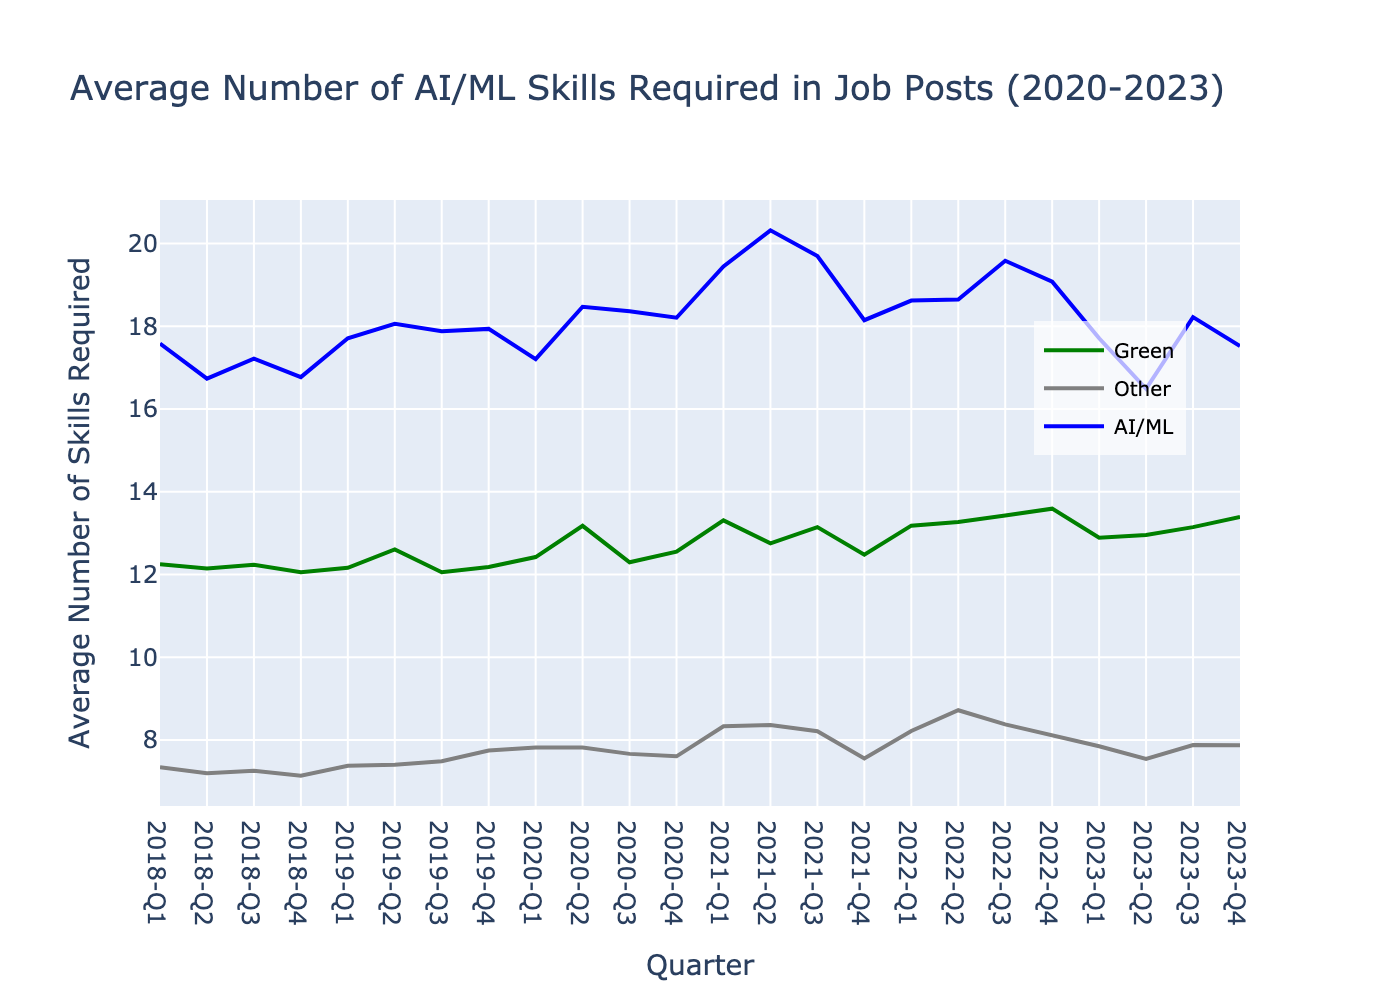

In [623]:
def display_skill_intensity(df, title, file_name, group_colors):
    
    fig = go.Figure()
    
    for group in df["GROUP"].unique():
        fig.add_trace(
            go.Scatter(
                x=df[df["GROUP"] == group]["QUARTER"], 
                y=df[df["GROUP"] == group]["SKILL_COUNT"], 
                mode='lines', 
                name=group,
                marker_color = group_colors[group]
            )
        )
        
    fig.update_layout(
        title=title, 
        xaxis_title='Quarter', 
        yaxis_title='Average Number of Skills Required', 
        width=700, height=500,
        legend=dict(
            x=0.95,                # Horizontal position (0 = left, 1 = right)
            y=0.8,                # Vertical position (0 = bottom, 1 = top)
            xanchor='right',       # Anchor the x position to the right of the legend box
            yanchor='top',         # Anchor the y position to the top of the legend box
            bgcolor='rgba(255, 255, 255, 0.7)',  # Semi-transparent white background
            bordercolor='rgba(0, 0, 0, 0)',      # No border
            font=dict(
                size=10,
                color='black'
            )
        ),
    )
    
    with open(f"figures/{file_name}.png", "wb") as f:
        f.write(fig.to_image(format="png", engine="kaleido", scale=2))
        
    display(IPImage(filename=f"figures/{file_name}.png", width=600, height=500))
    
display_skill_intensity(skill_int_df, "Average Number of AI/ML Skills Required in Job Posts (2020-2023)", "skill_intensity_trend", group_colors)  

# Salary Trends

In [624]:
educ_sal_df = posts_df.with_column(
        "EDULEVELS_NAME_MIN",
        sfunc.when(sfunc.col("EDULEVELS_NAME_MIN") == "No Education Listed", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "A-levels or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Up to GCSEs or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Foundation/HNC/HND or equivalent", "HNC/HND")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Bachelor's or equivalent", "Bachelor")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Master's or equivalent", "Master")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Ph.D. or equivalent", "PhD Equivalent")
        .otherwise(sfunc.col("EDULEVELS_NAME_MIN"))  # Fallback to the original value if not in the map
    ) \
    .select(sfunc.year("POSTED").alias("YEAR"), sfunc.quarter("POSTED").alias("QUARTER"), posts_df["EDULEVELS_NAME_MIN"], posts_df["SALARY"]) \
    .group_by(["YEAR", "QUARTER", "EDULEVELS_NAME_MIN"]) \
    .agg(sfunc.median("SALARY").alias("SALARY")) \
    .select(sfunc.concat("YEAR", sfunc.concat(sfunc.lit("-Q"), "QUARTER")).alias("QUARTER"), "EDULEVELS_NAME_MIN", "SALARY") \
    .order_by("QUARTER") \
    .to_pandas()

other_sal_df = other_posts_df \
    .select(sfunc.year("POSTED").alias("YEAR"), sfunc.quarter("POSTED").alias("QUARTER"), other_posts_df["SALARY"]) \
    .group_by(["YEAR", "QUARTER"]) \
    .agg(sfunc.median("SALARY").alias("SALARY")) \
    .select(sfunc.concat("YEAR", sfunc.concat(sfunc.lit("-Q"), "QUARTER")).alias("QUARTER"), "SALARY") \
    .order_by("QUARTER") \
    .to_pandas()
         
ai_sal_df = ai_posts_df \
    .select(sfunc.year("POSTED").alias("YEAR"), sfunc.quarter("POSTED").alias("QUARTER"), ai_posts_df["SALARY"]) \
    .group_by(["YEAR", "QUARTER"]) \
    .agg(sfunc.median("SALARY").alias("SALARY")) \
    .select(sfunc.concat("YEAR", sfunc.concat(sfunc.lit("-Q"), "QUARTER")).alias("QUARTER"), "SALARY") \
    .order_by("QUARTER") \
    .to_pandas()
    
green_sal_df = green_posts_df \
    .select(sfunc.year("POSTED").alias("YEAR"), sfunc.quarter("POSTED").alias("QUARTER"), green_posts_df["SALARY"]) \
    .group_by(["YEAR", "QUARTER"]) \
    .agg(sfunc.median("SALARY").alias("SALARY")) \
    .select(sfunc.concat("YEAR", sfunc.concat(sfunc.lit("-Q"), "QUARTER")).alias("QUARTER"), "SALARY") \
    .order_by("QUARTER") \
    .to_pandas()
    
sal_df = pd.concat([ai_sal_df, green_sal_df, other_sal_df], keys=["AI/ML", "Green", "Other"]).reset_index(level=0, names=["GROUP"])

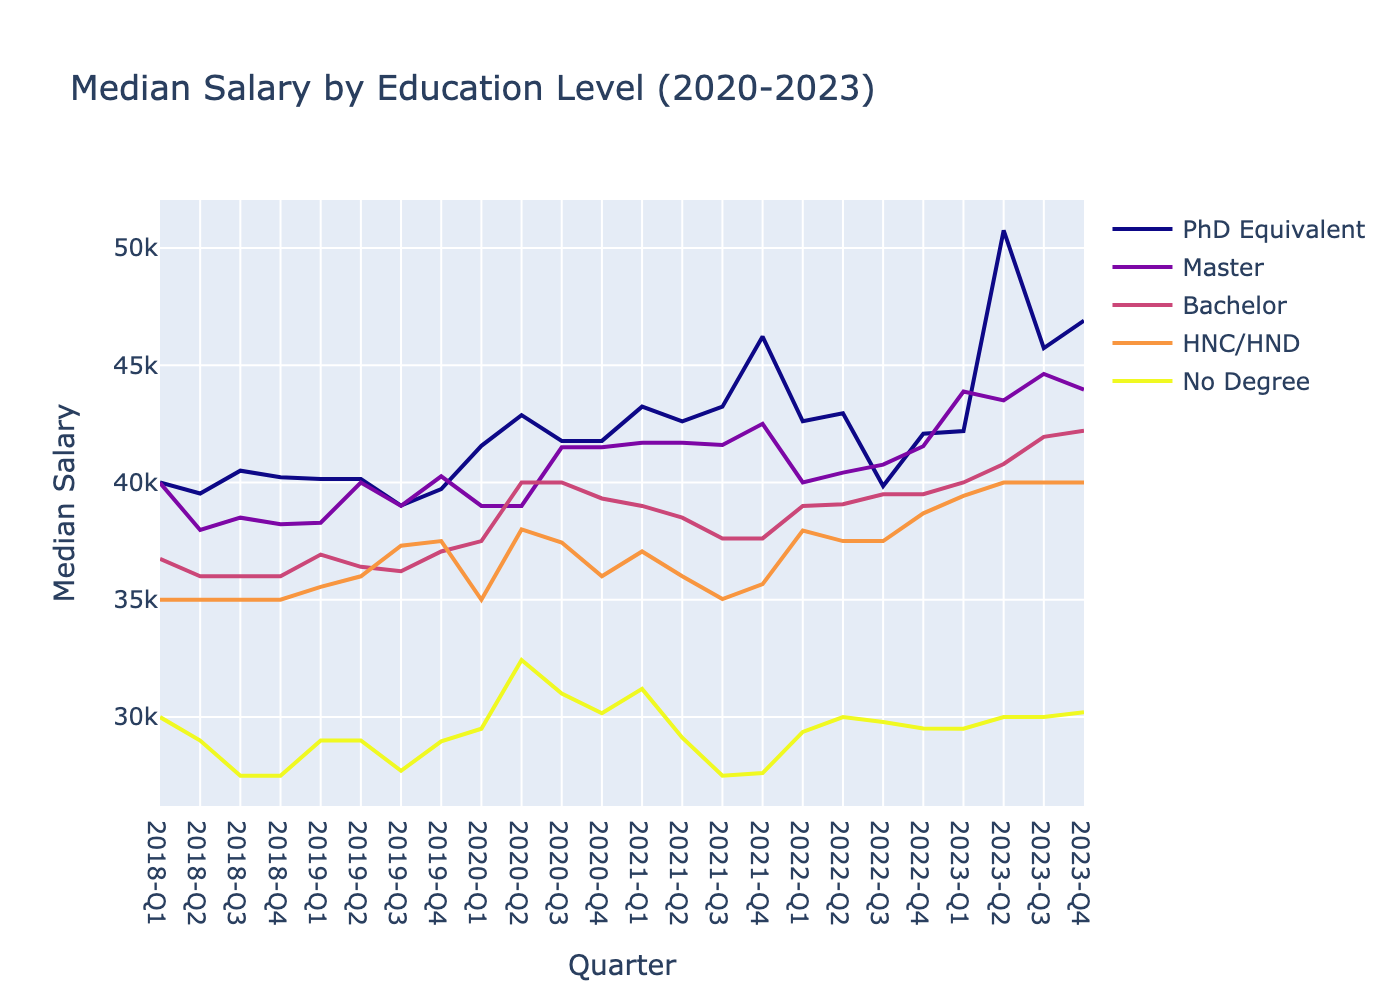

In [625]:
def display_educ_sal_trends(df, title, filename, educ_colors):
    
    fig = go.Figure()
    
    edu_levels = [
        "PhD Equivalent",
        "Master",
        "Bachelor",
        "HNC/HND",
        "No Degree"
    ]
    
    for group in edu_levels:
        fig.add_trace(
            go.Scatter(
                x=df[df["EDULEVELS_NAME_MIN"] == group]["QUARTER"], 
                y=df[df["EDULEVELS_NAME_MIN"] == group]["SALARY"], 
                mode='lines', 
                name=group,
                marker_color = educ_colors[group]
            )
        )
        
    fig.update_layout(
        title=title, 
        xaxis_title='Quarter', 
        yaxis_title='Median Salary', 
        width=700, height=500
    )
    
    with open(f"figures/{filename}.png", "wb") as f:
        f.write(fig.to_image(format="png", engine="kaleido", scale=2))
        
    display(IPImage(filename=f"figures/{filename}.png", width=600, height=500))
    
    
display_educ_sal_trends(educ_sal_df, "Median Salary by Education Level (2020-2023)", "educ_sal_trends", educ_colors)

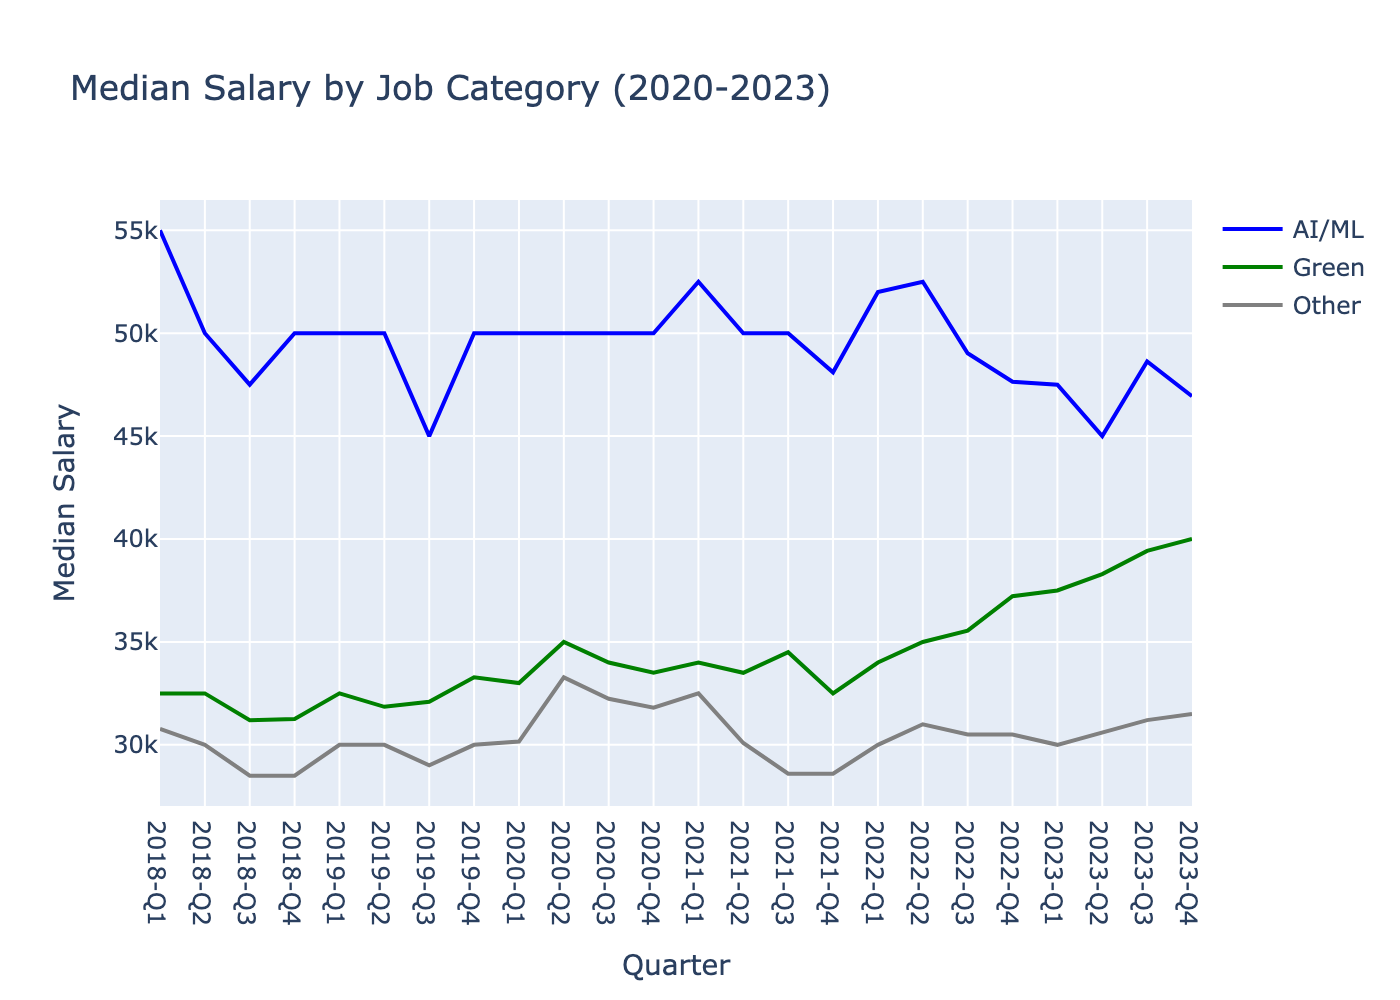

In [626]:
def display_group_sal_trend(df, title, filename, group_colors):
    
    fig = go.Figure()
    
    for group in df["GROUP"].unique():
        fig.add_trace(
            go.Scatter(
                x=df[df["GROUP"] == group]["QUARTER"], 
                y=df[df["GROUP"] == group]["SALARY"], 
                mode='lines', 
                name=group,
                marker_color = group_colors[group]
            )
        )
        
    fig.update_layout(
        title=title, 
        xaxis_title='Quarter', 
        yaxis_title='Median Salary', 
        width=700, height=500
    )
    
    with open(f"figures/{filename}.png", "wb") as f:
        f.write(fig.to_image(format="png", engine="kaleido", scale=2))
        
    display(IPImage(filename=f"figures/{filename}.png", width=600, height=500))
    
display_group_sal_trend(sal_df, "Median Salary by Job Category (2020-2023)", "group_sal_trend", group_colors)

# Individual Skill Salaries

In [627]:
def get_skill_sal_df(all_post_df, skill_df): 
    
    return all_post_df \
        .join(skill_df, all_post_df["ID"] == skill_df["ID"]) \
        .select(sfunc.count("SALARY").alias("CNT"), sfunc.median("SALARY").alias("MEDIAN_SALARY")) \
        .to_pandas()

# minimum salary counts      
min_count = 10

ai_skill_sal_list =ai2_skill_counts_df[ai2_skill_counts_df["CNT"] > min_count]["SKILL_NAME"].tolist()
ai_skill_sal_df = [
    skills_df[skills_df["SKILL_NAME"] == skill] 
    for skill in tqdm(ai_skill_sal_list)
]
ai_skill_sal_df = pd.concat(
    [get_skill_sal_df(ai_posts_df, ts_df) for ts_df in tqdm(ai_skill_sal_df)],
    keys=ai_skill_sal_list
).reset_index(level=0, names=["SKILL_NAME"])

green_skill_sal_list = green_skill_counts_df[green_skill_counts_df["CNT"] > min_count]["SKILL_NAME"].tolist()
green_skill_sal_df = [
    skills_df[skills_df["SKILL_NAME"] == skill] 
    for skill in tqdm(green_skill_sal_list)
]
green_skill_sal_df = pd.concat(
    [get_skill_sal_df(green_posts_df, ts_df) for ts_df in tqdm(green_skill_sal_df)],
    keys=green_skill_sal_list
).reset_index(level=0, names=["SKILL_NAME"])

100%|██████████| 202/202 [08:59<00:00,  2.67s/it]


In [628]:
ai_skill_sal_df2 = ai_skill_sal_df[ai_skill_sal_df["CNT"] > 30]
green_skill_sal_df2 = green_skill_sal_df[green_skill_sal_df["CNT"] > 30]

high_sal_ai_skill_df = ai_skill_sal_df2.sort_values("MEDIAN_SALARY", ascending=False).head(10)
high_sal_green_skill_df = green_skill_sal_df2.sort_values("MEDIAN_SALARY", ascending=False).head(10)

display(high_sal_ai_skill_df)
display(high_sal_green_skill_df)

,SKILL_NAME,CNT,MEDIAN_SALARY
0,AWS SageMaker,121,75000.0
0,MLOps (Machine Learning Operations),264,75000.0
0,Recommender Systems,160,72500.0
0,Dask (Software),56,68750.0
0,Theano (Software),43,67500.0
0,PyTorch (Machine Learning Library),678,67500.0
0,Feature Engineering,97,67500.0
0,Keras (Neural Network Library),344,67500.0
0,Xgboost,55,65000.0
0,Machine Learning Model Training,31,65000.0


,SKILL_NAME,CNT,MEDIAN_SALARY
0,Nuclear Safety,483,52750.0
0,Nuclear Power,729,50000.0
0,Renewable Energy Development,32,50000.0
0,Wind Farm Development,52,47790.0
0,Energy Transport,75,47500.0
0,Renewable Energy Markets,64,46000.0
0,Low Carbon Solutions,52,45932.5
0,Energy Transformation,135,45884.0
0,Energy Production,86,45380.0
0,ISO 14064,44,45250.0


# Degree Salaries

In [629]:
other_deg_sal_df = other_posts_df.with_column(
        "EDULEVELS_NAME_MIN",
        sfunc.when(sfunc.col("EDULEVELS_NAME_MIN") == "No Education Listed", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "A-levels or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Up to GCSEs or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Foundation/HNC/HND or equivalent", "HNC/HND")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Bachelor's or equivalent", "Bachelor")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Master's or equivalent", "Master")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Ph.D. or equivalent", "PhD Equivalent")
        .otherwise(sfunc.col("EDULEVELS_NAME_MIN"))  # Fallback to the original value if not in the map
    ) \
    .select(other_posts_df["EDULEVELS_NAME_MIN"], other_posts_df["SALARY"]) \
    .group_by("EDULEVELS_NAME_MIN") \
    .agg(sfunc.median("SALARY").alias("SALARY")) \
    .to_pandas()
    
ai_deg_sal_df = ai_posts_df.with_column(
        "EDULEVELS_NAME_MIN",
        sfunc.when(sfunc.col("EDULEVELS_NAME_MIN") == "No Education Listed", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "A-levels or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Up to GCSEs or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Foundation/HNC/HND or equivalent", "HNC/HND")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Bachelor's or equivalent", "Bachelor")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Master's or equivalent", "Master")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Ph.D. or equivalent", "PhD Equivalent")
        .otherwise(sfunc.col("EDULEVELS_NAME_MIN"))  # Fallback to the original value if not in the map
    ) \
    .select(ai_posts_df["EDULEVELS_NAME_MIN"], ai_posts_df["SALARY"]) \
    .group_by("EDULEVELS_NAME_MIN") \
    .agg(sfunc.median("SALARY").alias("SALARY")) \
    .to_pandas()
    
green_deg_sal_df = green_posts_df.with_column(
        "EDULEVELS_NAME_MIN",
        sfunc.when(sfunc.col("EDULEVELS_NAME_MIN") == "No Education Listed", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "A-levels or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Up to GCSEs or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Foundation/HNC/HND or equivalent", "HNC/HND")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Bachelor's or equivalent", "Bachelor")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Master's or equivalent", "Master")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Ph.D. or equivalent", "PhD Equivalent")
        .otherwise(sfunc.col("EDULEVELS_NAME_MIN"))  # Fallback to the original value if not in the map
    ) \
    .select(green_posts_df["EDULEVELS_NAME_MIN"], green_posts_df["SALARY"]) \
    .group_by("EDULEVELS_NAME_MIN") \
    .agg(sfunc.median("SALARY").alias("SALARY")) \
    .to_pandas()
    
deg_sal_df = pd.concat([ai_deg_sal_df, green_deg_sal_df, other_deg_sal_df], keys=["AI/ML", "Green", "Other"]).reset_index(level=0, names=["GROUP"])

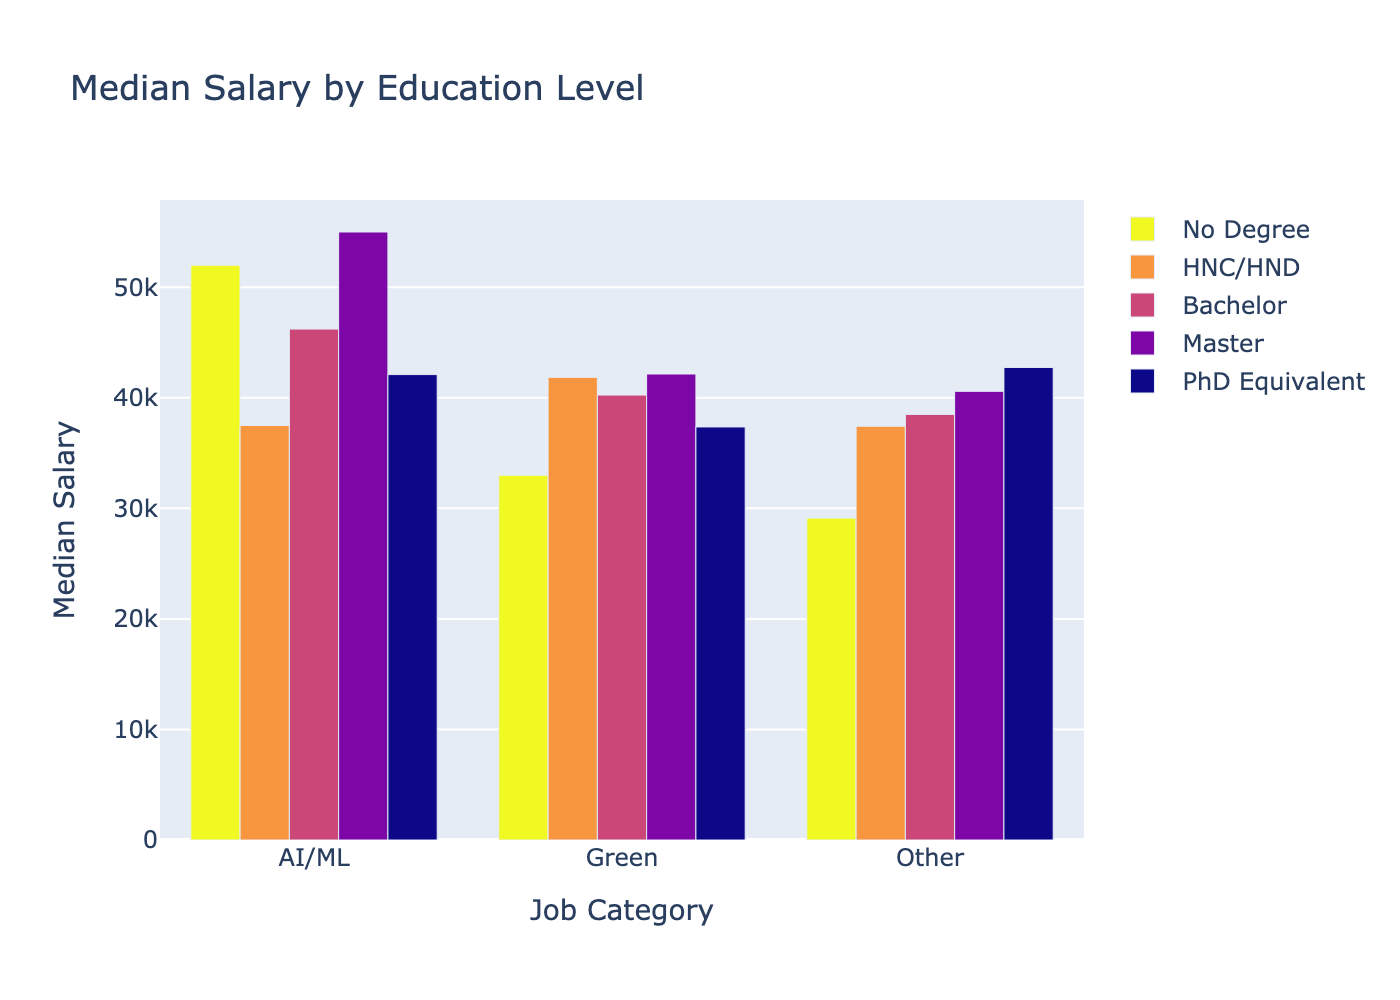

In [630]:
def display_degree_salaries(df, title, filename, educ_colors):
    
    fig = go.Figure()
    
    edu_levels = [
        "No Degree",
        "HNC/HND",
        "Bachelor",
        "Master",
        "PhD Equivalent"
    ]
    
    for level in edu_levels:
        fig.add_trace(
            go.Bar(
                x=df[df["EDULEVELS_NAME_MIN"] == level]["GROUP"], 
                y=df[df["EDULEVELS_NAME_MIN"] == level]["SALARY"], 
                name=level,
                marker_color = educ_colors[level]
            )
        )
        
    fig.update_layout(
        title=title, 
        barmode='group',
        xaxis_title='Job Category', 
        yaxis_title='Median Salary', 
        width=700, height=500
    )
    
    with open(f"figures/{filename}.png", "wb") as f:
        f.write(fig.to_image(format="png", engine="kaleido", scale=2))
        
    display(IPImage(filename=f"figures/{filename}.png", width=600, height=500))
    
display_degree_salaries(deg_sal_df, "Median Salary by Education Level", "degree_salaries", educ_colors)

# Education Premiums by Group

In [652]:
ai_reg_df = ai_posts_df.with_column(
        "EDULEVELS_NAME_MIN",
        sfunc.when(sfunc.col("EDULEVELS_NAME_MIN") == "No Education Listed", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "A-levels or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Up to GCSEs or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Foundation/HNC/HND or equivalent", "HNC/HND")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Bachelor's or equivalent", "Bachelor")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Master's or equivalent", "Master")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Ph.D. or equivalent", "PhD Equivalent")
        .otherwise(sfunc.col("EDULEVELS_NAME_MIN"))  # Fallback to the original value if not in the map
    ) \
    .select(
        "ID",
        "SALARY",
        "MIN_YEARS_EXPERIENCE",
        sfunc.call_builtin("ifnull", sfunc.col("EDULEVELS_NAME_MIN"), "No Degree").alias("EDULEVELS_NAME_MIN"),
        sfunc.year("POSTED").alias("YEAR"), 
        sfunc.call_builtin("ifnull", sfunc.col("UK_SIC_1_NAME"), "NULL").alias("UK_SIC_1_NAME"),
        sfunc.call_builtin("ifnull", sfunc.col("SOC_1_NAME"), "NULL").alias("SOC_1_NAME"),
        sfunc.call_builtin("ifnull", sfunc.col("SOC_2_NAME"), "NULL").alias("SOC_2_NAME"),
        sfunc.call_builtin("ifnull", sfunc.col("NUTS1_NAME"), "NULL").alias("NUTS1_NAME"),
        sfunc.array_size(ai_posts_df["SKILLS"]).alias("SKILL_COUNT")
    ). \
    to_pandas()
    
green_reg_df = green_posts_df.with_column(
        "EDULEVELS_NAME_MIN",
        sfunc.when(sfunc.col("EDULEVELS_NAME_MIN") == "No Education Listed", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "A-levels or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Up to GCSEs or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Foundation/HNC/HND or equivalent", "HNC/HND")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Bachelor's or equivalent", "Bachelor")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Master's or equivalent", "Master")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Ph.D. or equivalent", "PhD Equivalent")
        .otherwise(sfunc.col("EDULEVELS_NAME_MIN"))  # Fallback to the original value if not in the map
    ) \
    .select(
        "ID",
        "SALARY",
        "MIN_YEARS_EXPERIENCE",
        sfunc.call_builtin("ifnull", sfunc.col("EDULEVELS_NAME_MIN"), "No Degree").alias("EDULEVELS_NAME_MIN"),
        sfunc.year("POSTED").alias("YEAR"), 
        sfunc.call_builtin("ifnull", sfunc.col("UK_SIC_1_NAME"), "NULL").alias("UK_SIC_1_NAME"),
        sfunc.call_builtin("ifnull", sfunc.col("SOC_1_NAME"), "NULL").alias("SOC_1_NAME"),
        sfunc.call_builtin("ifnull", sfunc.col("SOC_2_NAME"), "NULL").alias("SOC_2_NAME"),
        sfunc.call_builtin("ifnull", sfunc.col("NUTS1_NAME"), "NULL").alias("NUTS1_NAME"),
        sfunc.array_size(green_posts_df["SKILLS"]).alias("SKILL_COUNT")
    ). \
    to_pandas()
    
other_reg_df = other_posts_df.with_column(
        "EDULEVELS_NAME_MIN",
        sfunc.when(sfunc.col("EDULEVELS_NAME_MIN") == "No Education Listed", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "A-levels or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Up to GCSEs or equivalent", "No Degree")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Foundation/HNC/HND or equivalent", "HNC/HND")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Bachelor's or equivalent", "Bachelor")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Master's or equivalent", "Master")
        .when(sfunc.col("EDULEVELS_NAME_MIN") == "Ph.D. or equivalent", "PhD Equivalent")
        .otherwise(sfunc.col("EDULEVELS_NAME_MIN"))  # Fallback to the original value if not in the map
    ) \
    .select(
        "ID",
        "SALARY",
        "MIN_YEARS_EXPERIENCE",
        sfunc.call_builtin("ifnull", sfunc.col("EDULEVELS_NAME_MIN"), "No Degree").alias("EDULEVELS_NAME_MIN"),
        sfunc.year("POSTED").alias("YEAR"), 
        sfunc.call_builtin("ifnull", sfunc.col("UK_SIC_1_NAME"), "NULL").alias("UK_SIC_1_NAME"),
        sfunc.call_builtin("ifnull", sfunc.col("SOC_1_NAME"), "NULL").alias("SOC_1_NAME"),
        sfunc.call_builtin("ifnull", sfunc.col("SOC_2_NAME"), "NULL").alias("SOC_2_NAME"),
        sfunc.call_builtin("ifnull", sfunc.col("NUTS1_NAME"), "NULL").alias("NUTS1_NAME"),
        sfunc.array_size(other_posts_df["SKILLS"]).alias("SKILL_COUNT")
    ). \
    to_pandas()
    
ai_reg_df["GROUP"] = "AI/ML"
green_reg_df["GROUP"] = "Green"
other_reg_df["GROUP"] = "Other"

ai_reg_df["LOG_SALARY"] = np.log(ai_reg_df["SALARY"])
green_reg_df["LOG_SALARY"] = np.log(green_reg_df["SALARY"])

other_reg_df["LOG_SALARY"] = np.log(other_reg_df["SALARY"])

In [632]:
ai_deg_premium_noexp_ols = smf.ols("LOG_SALARY ~ C(EDULEVELS_NAME_MIN, levels=edu_levels) + YEAR + UK_SIC_1_NAME + SOC_1_NAME + NUTS1_NAME", data=ai_reg_df).fit()
green_deg_premium_noexp_ols = smf.ols("LOG_SALARY ~ C(EDULEVELS_NAME_MIN, levels=edu_levels) + YEAR + UK_SIC_1_NAME + SOC_1_NAME + NUTS1_NAME", data=green_reg_df).fit()    
other_deg_premium_noexp_ols = smf.ols("LOG_SALARY ~ C(EDULEVELS_NAME_MIN, levels=edu_levels) + YEAR + UK_SIC_1_NAME + SOC_1_NAME + NUTS1_NAME", data=other_reg_df).fit()

ai_deg_premium_exp_ols = smf.ols("LOG_SALARY ~ C(EDULEVELS_NAME_MIN, levels=edu_levels) + MIN_YEARS_EXPERIENCE + YEAR + UK_SIC_1_NAME + SOC_1_NAME + NUTS1_NAME", data=ai_reg_df).fit()
green_deg_premium_exp_ols = smf.ols("LOG_SALARY ~ C(EDULEVELS_NAME_MIN, levels=edu_levels) + MIN_YEARS_EXPERIENCE + YEAR + UK_SIC_1_NAME + SOC_1_NAME + NUTS1_NAME", data=green_reg_df).fit()    
other_deg_premium_exp_ols = smf.ols("LOG_SALARY ~ C(EDULEVELS_NAME_MIN, levels=edu_levels) + MIN_YEARS_EXPERIENCE + YEAR + UK_SIC_1_NAME + SOC_1_NAME + NUTS1_NAME", data=other_reg_df).fit()

In [633]:
def select_deg_premium_coefs(ols, group): 
    
    ols_r2 = ols.rsquared
    ols_coefs = ols.summary2().tables[1]
    ols_coefs = ols_coefs.loc[
        [
            "C(EDULEVELS_NAME_MIN, levels=edu_levels)[T.HNC/HND]",
            "C(EDULEVELS_NAME_MIN, levels=edu_levels)[T.Bachelor]",
            "C(EDULEVELS_NAME_MIN, levels=edu_levels)[T.Master]",
            "C(EDULEVELS_NAME_MIN, levels=edu_levels)[T.PhD Equivalent]",
        ]
    ]
    ols_coefs.index = ["HNC/HND", "Bachelor", "Master", "PhD Equivalent"]
    ols_coefs = ols_coefs.reset_index().rename(columns={"index": "Variable", "Coef.": "Coefficient"})
    ols_coefs["GROUP"] = group
    return ols_r2, ols_coefs

ai_deg_premium_noexp_r2, ai_deg_premium_noexp_coefs = select_deg_premium_coefs(ai_deg_premium_noexp_ols, "AI/ML")
green_deg_premium_noexp_r2, green_deg_premium_noexp_coefs = select_deg_premium_coefs(green_deg_premium_noexp_ols, "Green")
other_deg_premium_noexp_r2, other_deg_premium_noexp_coefs = select_deg_premium_coefs(other_deg_premium_noexp_ols, "Other")
deg_premium_noexp_coefs = pd.concat([ai_deg_premium_noexp_coefs, green_deg_premium_noexp_coefs, other_deg_premium_noexp_coefs])
deg_premium_noexp_r2s = [ai_deg_premium_noexp_r2, green_deg_premium_noexp_r2, other_deg_premium_noexp_r2]

ai_deg_premium_exp_r2, ai_deg_premium_exp_coefs = select_deg_premium_coefs(ai_deg_premium_exp_ols, "AI/ML")
green_deg_premium_exp_r2, green_deg_premium_exp_coefs = select_deg_premium_coefs(green_deg_premium_exp_ols, "Green")
other_deg_premium_exp_r2, other_deg_premium_exp_coefs = select_deg_premium_coefs(other_deg_premium_exp_ols, "Other")
deg_premium_exp_coefs = pd.concat([ai_deg_premium_exp_coefs, green_deg_premium_exp_coefs, other_deg_premium_exp_coefs])
deg_premium_exp_r2s = [ai_deg_premium_exp_r2, green_deg_premium_exp_r2, other_deg_premium_exp_r2]   

In [634]:
ai_exp_coverage = ai_reg_df["MIN_YEARS_EXPERIENCE"].isnull().sum() / len(ai_reg_df)
green_exp_coverage = green_reg_df["MIN_YEARS_EXPERIENCE"].isnull().sum() / len(green_reg_df)
other_exp_coverage = other_reg_df["MIN_YEARS_EXPERIENCE"].isnull().sum() / len(other_reg_df)

print(f"AI/ML Experience Coverage: {ai_exp_coverage:.2%}")
print(f"Green Experience Coverage: {green_exp_coverage:.2%}")
print(f"Other Experience Coverage: {other_exp_coverage:.2%}")

ai_sal_coverage = ai_reg_df["SALARY"].isnull().sum() / len(ai_reg_df)
green_sal_coverage = green_reg_df["SALARY"].isnull().sum() / len(green_reg_df)
other_sal_coverage = other_reg_df["SALARY"].isnull().sum() / len(other_reg_df)

print(f"AI/ML Salary Coverage: {ai_sal_coverage:.2%}")
print(f"Green Salary Coverage: {green_sal_coverage:.2%}")
print(f"Other Salary Coverage: {other_sal_coverage:.2%}")

AI/ML Experience Coverage: 76.24%
Green Experience Coverage: 75.53%
Other Experience Coverage: 78.61%
AI/ML Salary Coverage: 69.02%
Green Salary Coverage: 63.30%
Other Salary Coverage: 61.02%


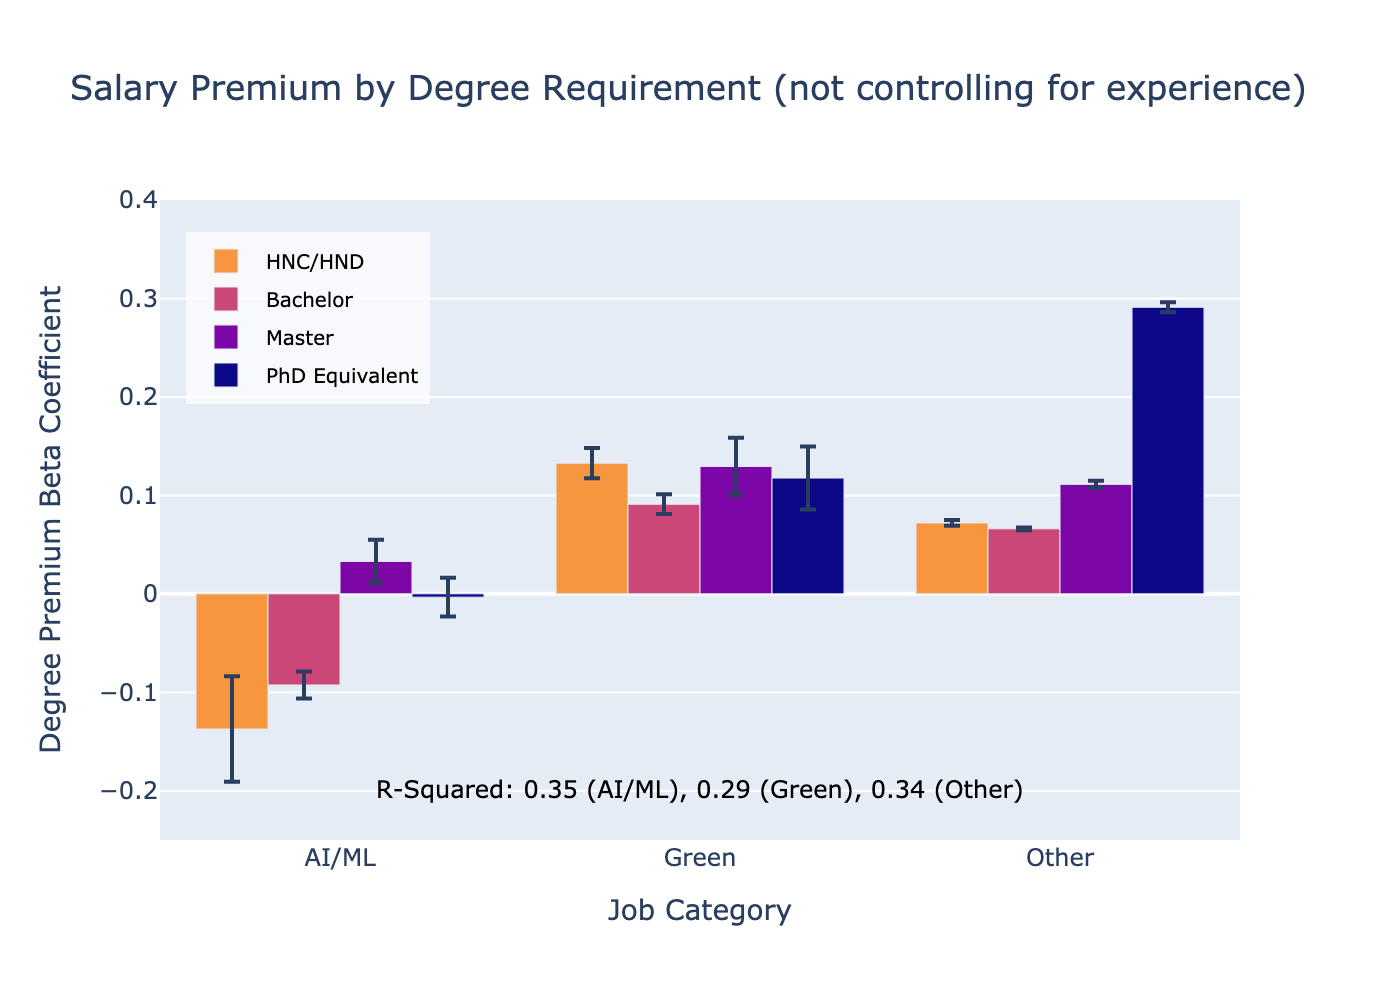

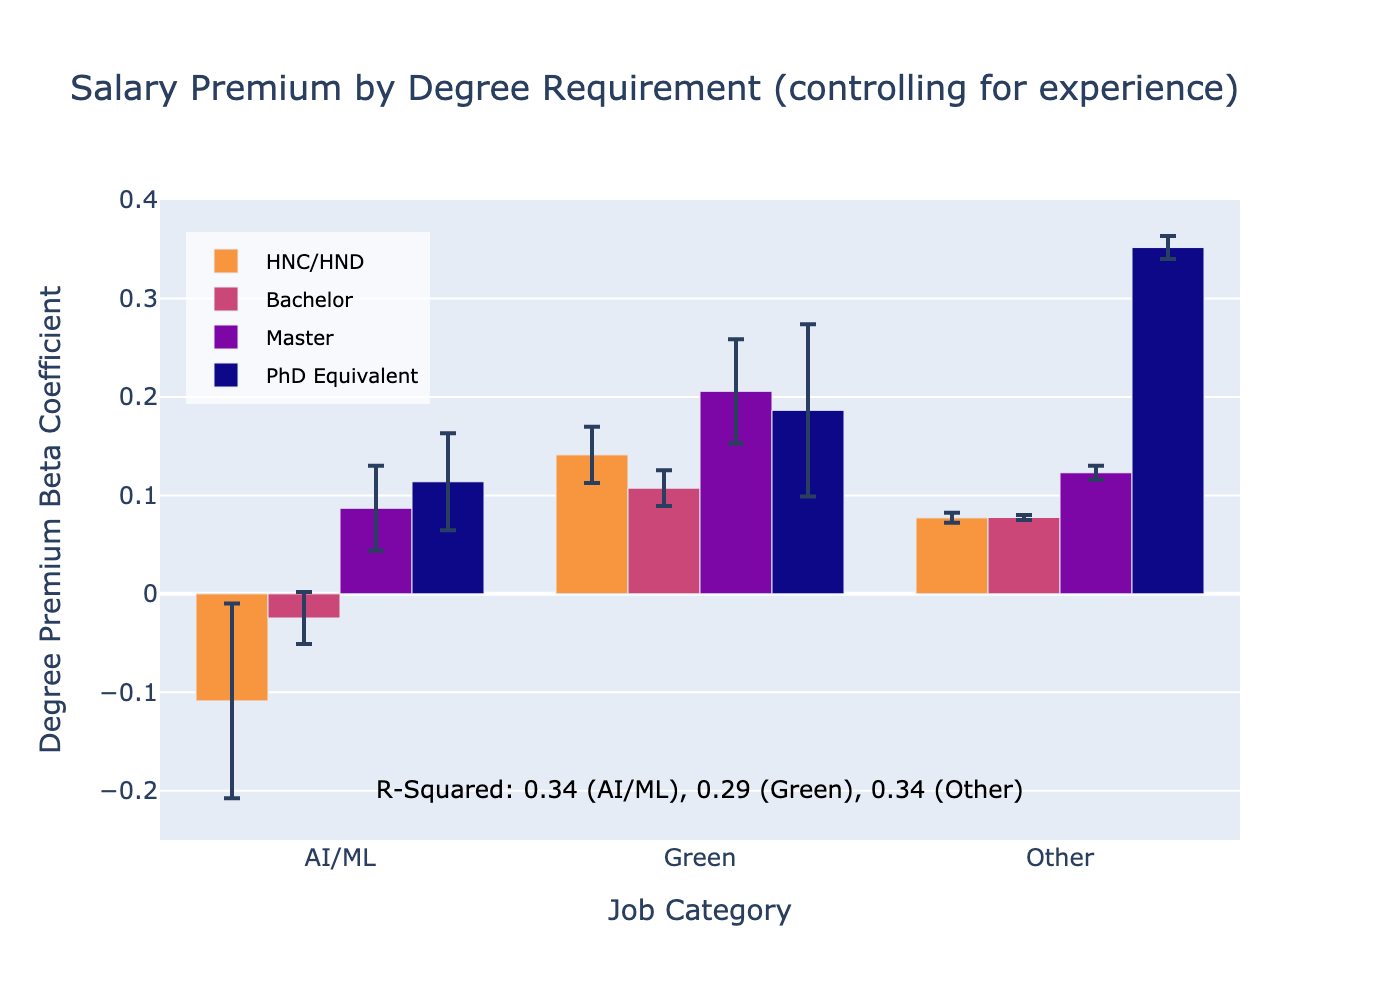

In [635]:
def display_degree_premiums(df, r2s, title, filename, educ_colors):
    
    fig = go.Figure()
    
    edu_levels = [
        "HNC/HND",
        "Bachelor",
        "Master",
        "PhD Equivalent"
    ]
    
    df["CONF"] = np.abs(df["Coefficient"] - df["[0.025"])
    
    for level in edu_levels:
        fig.add_trace(
            # add bar with confidence interval
            go.Bar(
                x=df[df["Variable"] == level]["GROUP"], 
                y=df[df["Variable"] == level]["Coefficient"], 
                name=level,
                marker_color = educ_colors[level],
                error_y=dict(
                    type='data',
                    array=df[df["Variable"] == level]["CONF"],
                    visible=True
                )
            )
        )
        
    fig.update_layout(
        title=title, 
        barmode='group',
        xaxis_title='Job Category', 
        yaxis_title='Degree Premium (β)', 
        width=700, height=500,
        yaxis_range=[-0.25, 0.4],
        legend=dict(
            x=0.25,               
            y=0.95,                
            xanchor='right',       
            yanchor='top',         
            bgcolor='rgba(255, 255, 255, 0.7)', 
            bordercolor='rgba(0, 0, 0, 0)',     
            font=dict(
                size=10,
                color='black'
            )
        ),
    )
    
    fig.add_annotation(
        x=0.5,
        y=0.05,
        xref='paper',
        yref='paper',
        text=f"R-Squared: {r2s[0]:.2f} (AI/ML), {r2s[1]:.2f} (Green), {r2s[2]:.2f} (Other)",
        showarrow=False,
        font=dict(
            size=12,
            color='black'
        )
    )
    
    with open(f"figures/{filename}.png", "wb") as f:
        f.write(fig.to_image(format="png", engine="kaleido", scale=2))
        
    display(IPImage(filename=f"figures/{filename}.png", width=600, height=500))

    
display_degree_premiums(deg_premium_noexp_coefs, deg_premium_noexp_r2s, "Salary Premium by Degree Requirement (not controlling for experience)", "degree_premiums_noexp", educ_colors)
display_degree_premiums(deg_premium_exp_coefs, deg_premium_exp_r2s, "Salary Premium by Degree Requirement (controlling for experience)", "degree_premiums_exp", educ_colors)

# Green or AI Skill Premiums

In [654]:
reg_df = pd.concat([ai_reg_df, green_reg_df, other_reg_df]).sample(frac=1).reset_index(drop=True)
group_dummies = pd.get_dummies(reg_df["GROUP"], dtype=int)
reg_df = pd.concat([reg_df, group_dummies], axis=1)
reg_df.rename(columns={"AI/ML": "AI", "Green": "GREEN", "Other": "OTHER"}, inplace=True)

educ_ols = smf.ols("LOG_SALARY ~ C(EDULEVELS_NAME_MIN, levels=edu_levels) + MIN_YEARS_EXPERIENCE + YEAR + UK_SIC_1_NAME + SOC_1_NAME + NUTS1_NAME", data=reg_df).fit()
ai_skill_premium_educ_ols = smf.ols("LOG_SALARY ~ AI + C(EDULEVELS_NAME_MIN, levels=edu_levels) + MIN_YEARS_EXPERIENCE + YEAR + UK_SIC_1_NAME + SOC_1_NAME + NUTS1_NAME", data=reg_df).fit()
ai_skill_premium_noeduc_ols = smf.ols("LOG_SALARY ~ AI + MIN_YEARS_EXPERIENCE + YEAR + UK_SIC_1_NAME + SOC_1_NAME + NUTS1_NAME", data=reg_df).fit()
green_skill_premium_educ_ols = smf.ols("LOG_SALARY ~ GREEN + C(EDULEVELS_NAME_MIN, levels=edu_levels) + MIN_YEARS_EXPERIENCE + YEAR + UK_SIC_1_NAME + SOC_1_NAME + NUTS1_NAME", data=reg_df).fit()  
green_skill_premium_noeduc_ols = smf.ols("LOG_SALARY ~ GREEN + MIN_YEARS_EXPERIENCE + YEAR + UK_SIC_1_NAME + SOC_1_NAME + NUTS1_NAME", data=reg_df).fit()

In [637]:
def select_deg_premium_coefs(ols, group): 
    
    group_coef_map = {
        "AI/ML": "AI",
        "Green": "GREEN",
        "Other": "OTHER"
    }
    
    ols_r2 = ols.rsquared
    ols_coefs = ols.summary2().tables[1]
    ols_coefs = ols_coefs.loc[
        [
            group_coef_map[group],
            "C(EDULEVELS_NAME_MIN, levels=edu_levels)[T.HNC/HND]",
            "C(EDULEVELS_NAME_MIN, levels=edu_levels)[T.Bachelor]",
            "C(EDULEVELS_NAME_MIN, levels=edu_levels)[T.Master]",
            "C(EDULEVELS_NAME_MIN, levels=edu_levels)[T.PhD Equivalent]",
        ]
    ]
    ols_coefs.index = [group_coef_map[group], "HNC/HND", "Bachelor", "Master", "PhD Equivalent"]
    ols_coefs = ols_coefs.reset_index().rename(columns={"index": "Variable", "Coef.": "Coefficient"})
    ols_coefs["GROUP"] = group
    return ols_r2, ols_coefs

ai_skill_premium_educ_r2, ai_skill_premium_educ_coefs = select_deg_premium_coefs(ai_skill_premium_educ_ols, "AI/ML")  
green_skill_premium_educ_r2, green_skill_premium_educ_coefs = select_deg_premium_coefs(green_skill_premium_educ_ols, "Green")   

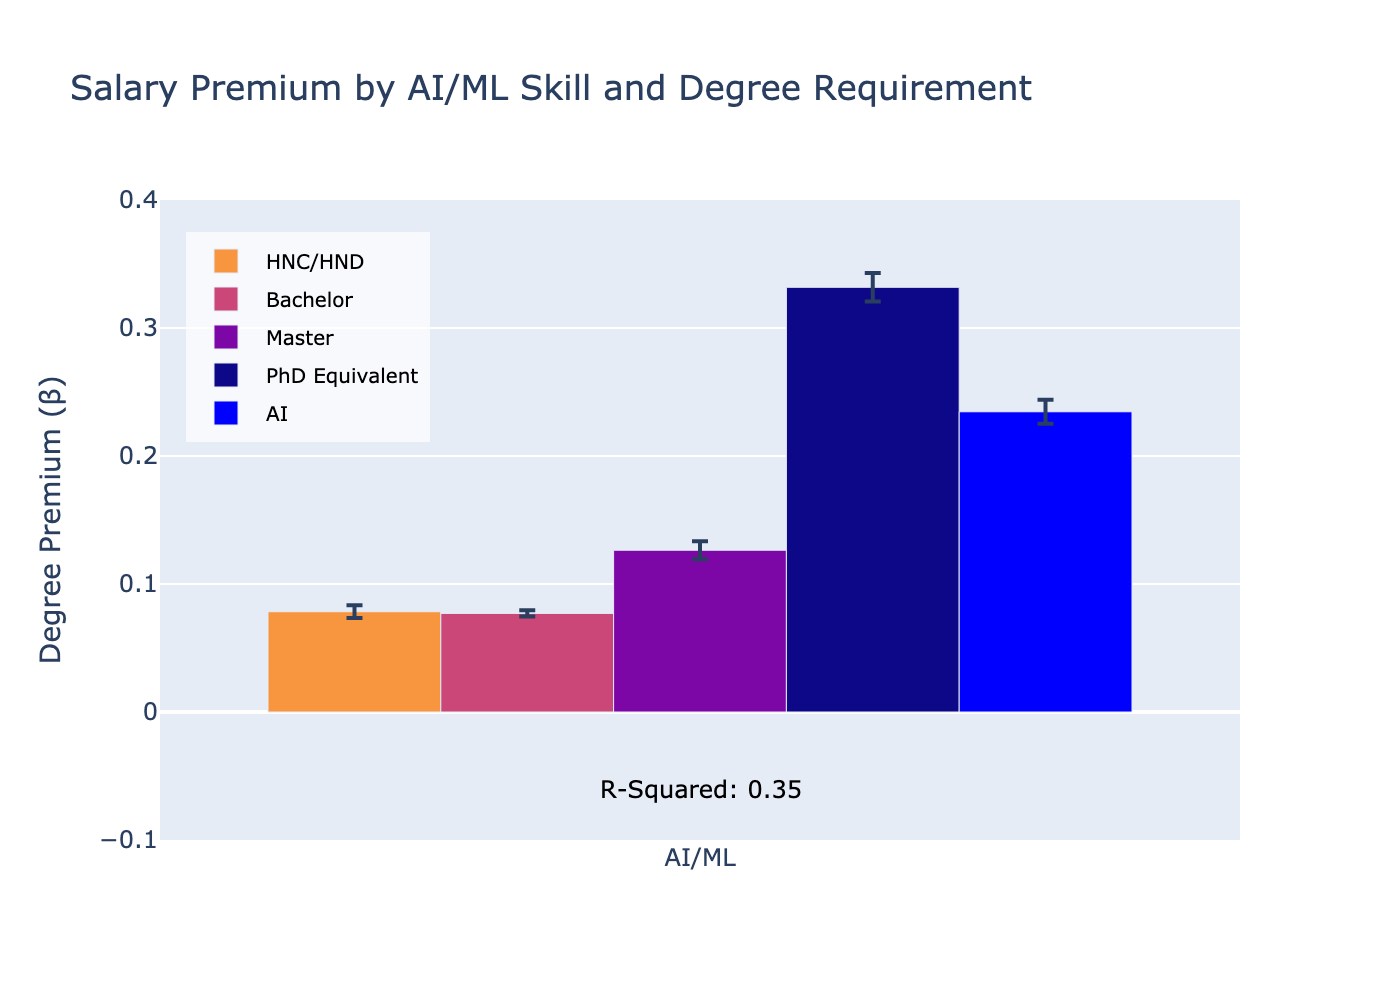

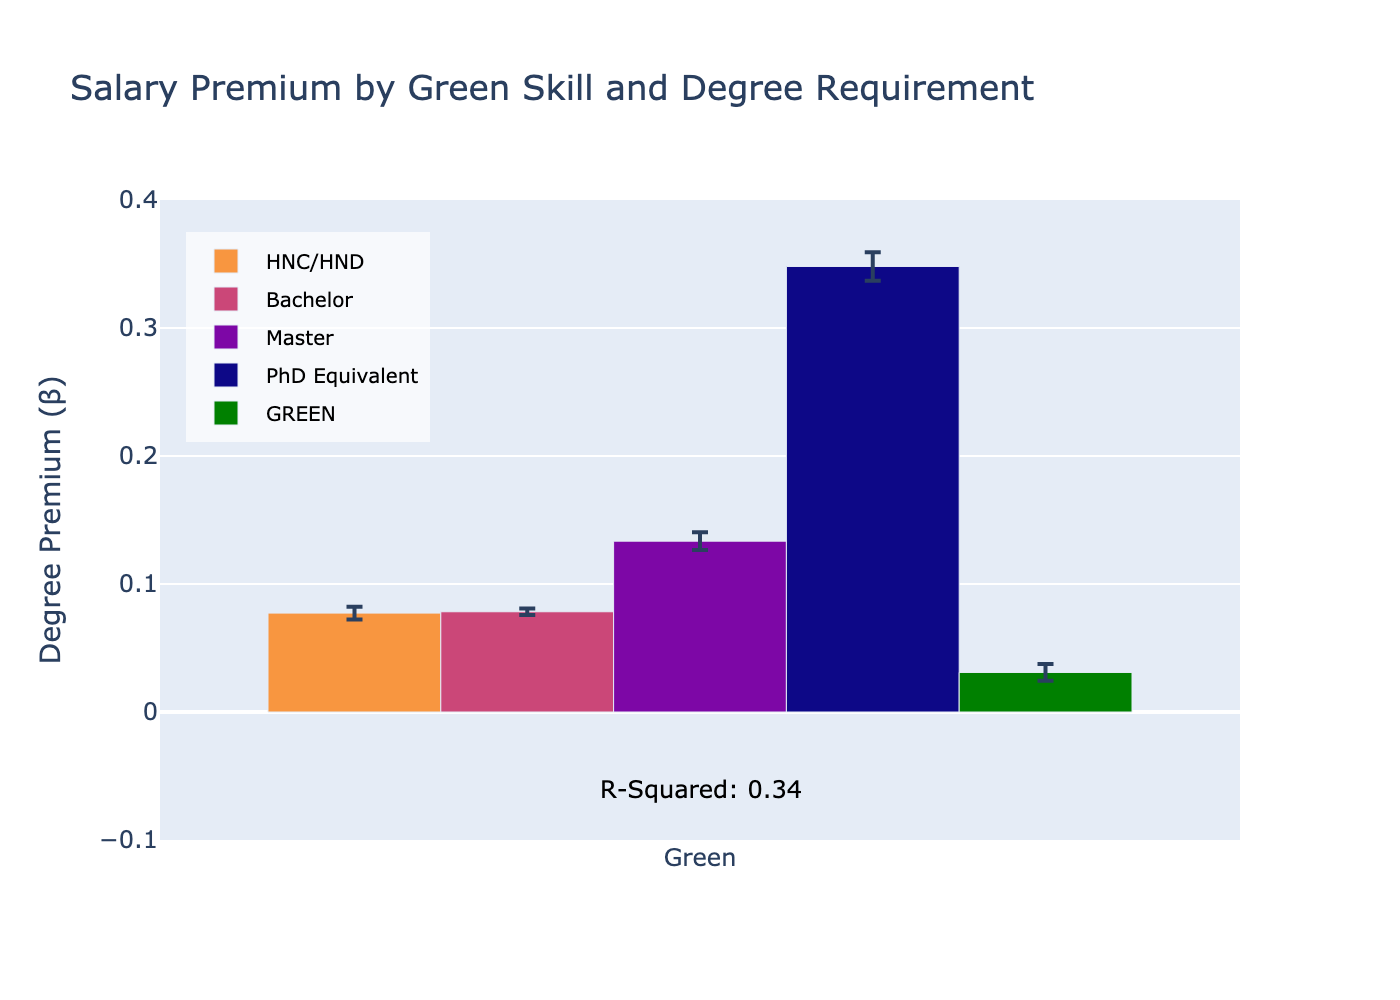

In [638]:
def display_skill_premiums(df, r2, group, title, filename, educ_colors):
    
    fig = go.Figure()
    
    coefs = [
        "HNC/HND",
        "Bachelor",
        "Master",
        "PhD Equivalent",
        "AI" if group == "AI/ML" else "GREEN",
    ]
    group_color = "blue" if group == "AI/ML" else "green"
    
    df["CONF"] = np.abs(df["Coefficient"] - df["[0.025"])
    
    for level in coefs:
        fig.add_trace(
            # add bar with confidence interval
            go.Bar(
                x=df[df["Variable"] == level]["GROUP"], 
                y=df[df["Variable"] == level]["Coefficient"], 
                name=level,
                marker_color = educ_colors[level] if level in educ_colors else group_color,
                error_y=dict(
                    type='data',
                    array=df[df["Variable"] == level]["CONF"],
                    visible=True
                )
            )
        )
        
    fig.update_layout(
        title=title, 
        yaxis_title='Degree Premium (β)', 
        width=700, height=500,
        yaxis_range=[-.1, 0.4],
        legend=dict(
            x=0.25,                # Horizontal position (0 = left, 1 = right)
            y=0.95,                # Vertical position (0 = bottom, 1 = top)
            xanchor='right',       # Anchor the x position to the right of the legend box
            yanchor='top',         # Anchor the y position to the top of the legend box
            bgcolor='rgba(255, 255, 255, 0.7)',  # Semi-transparent white background
            bordercolor='rgba(0, 0, 0, 0)',      # No border
            font=dict(
                size=10,
                color='black'
            )
        ),
    )
    
    fig.add_annotation(
        x=0.5,
        y=0.05,
        xref='paper',
        yref='paper',
        text=f"R-Squared: {r2:.2f}",
        showarrow=False,
        font=dict(
            size=12,
            color='black'
        )
    )
    
    with open(f"figures/{filename}.png", "wb") as f:
        f.write(fig.to_image(format="png", engine="kaleido", scale=2))
        
    display(IPImage(filename=f"figures/{filename}.png", width=600, height=500))
    
display_skill_premiums(ai_skill_premium_educ_coefs, ai_skill_premium_educ_r2, "AI/ML", "Salary Premium by AI/ML Skill and Degree Requirement", "ai_skill_premiums_educ", educ_colors)
display_skill_premiums(green_skill_premium_educ_coefs, green_skill_premium_educ_r2, "Green", "Salary Premium by Green Skill and Degree Requirement", "green_skill_premiums_educ", educ_colors)

# Regression Subsampling

In [640]:

def get_sub_ols_coef(df, group, occ, year):
    
    skill = "AI" if group == "AI/ML" else "GREEN"
    equation = f"LOG_SALARY ~ {skill} + C(EDULEVELS_NAME_MIN, levels=edu_levels) + MIN_YEARS_EXPERIENCE + UK_SIC_1_NAME + NUTS1_NAME"
    df = df[(df["YEAR"] == year) & (df["SOC_1_NAME"] == occ)]
    
    ols = smf.ols(equation, data=df).fit()
    
    # get skill coefficient
    skill_coef = ols.params[skill]
    
    # get demand
    demand = len(df[df[skill] == 1]) / len(df)
    
    return float(skill_coef), demand, len(df)

ai_coef_rows = []
for occ in tqdm(reg_df["SOC_1_NAME"].unique()):
    if occ == "NULL": continue
    for year in reg_df["YEAR"].unique():
        coef, demand, count = get_sub_ols_coef(reg_df, "AI/ML", occ, year)
        ai_coef_rows.append(
            {
                "GROUP": "AI/ML",
                "OCCUPATION": occ,
                "YEAR": year,
                "SKILL_COEF": coef,
                "DEMAND": demand,
                "COUNT": count
            }
        )
        
green_coef_rows = []
for occ in tqdm(reg_df["SOC_1_NAME"].unique()):
    if occ == "NULL": continue
    for year in reg_df["YEAR"].unique():
        coef, demand, count = get_sub_ols_coef(reg_df, "Green", occ, year)
        green_coef_rows.append(
            {
                "GROUP": "Green",
                "OCCUPATION": occ,
                "YEAR": year,
                "SKILL_COEF": coef,
                "DEMAND": demand,
                "COUNT": count
            }
        )

100%|██████████| 10/10 [00:52<00:00,  5.21s/it]


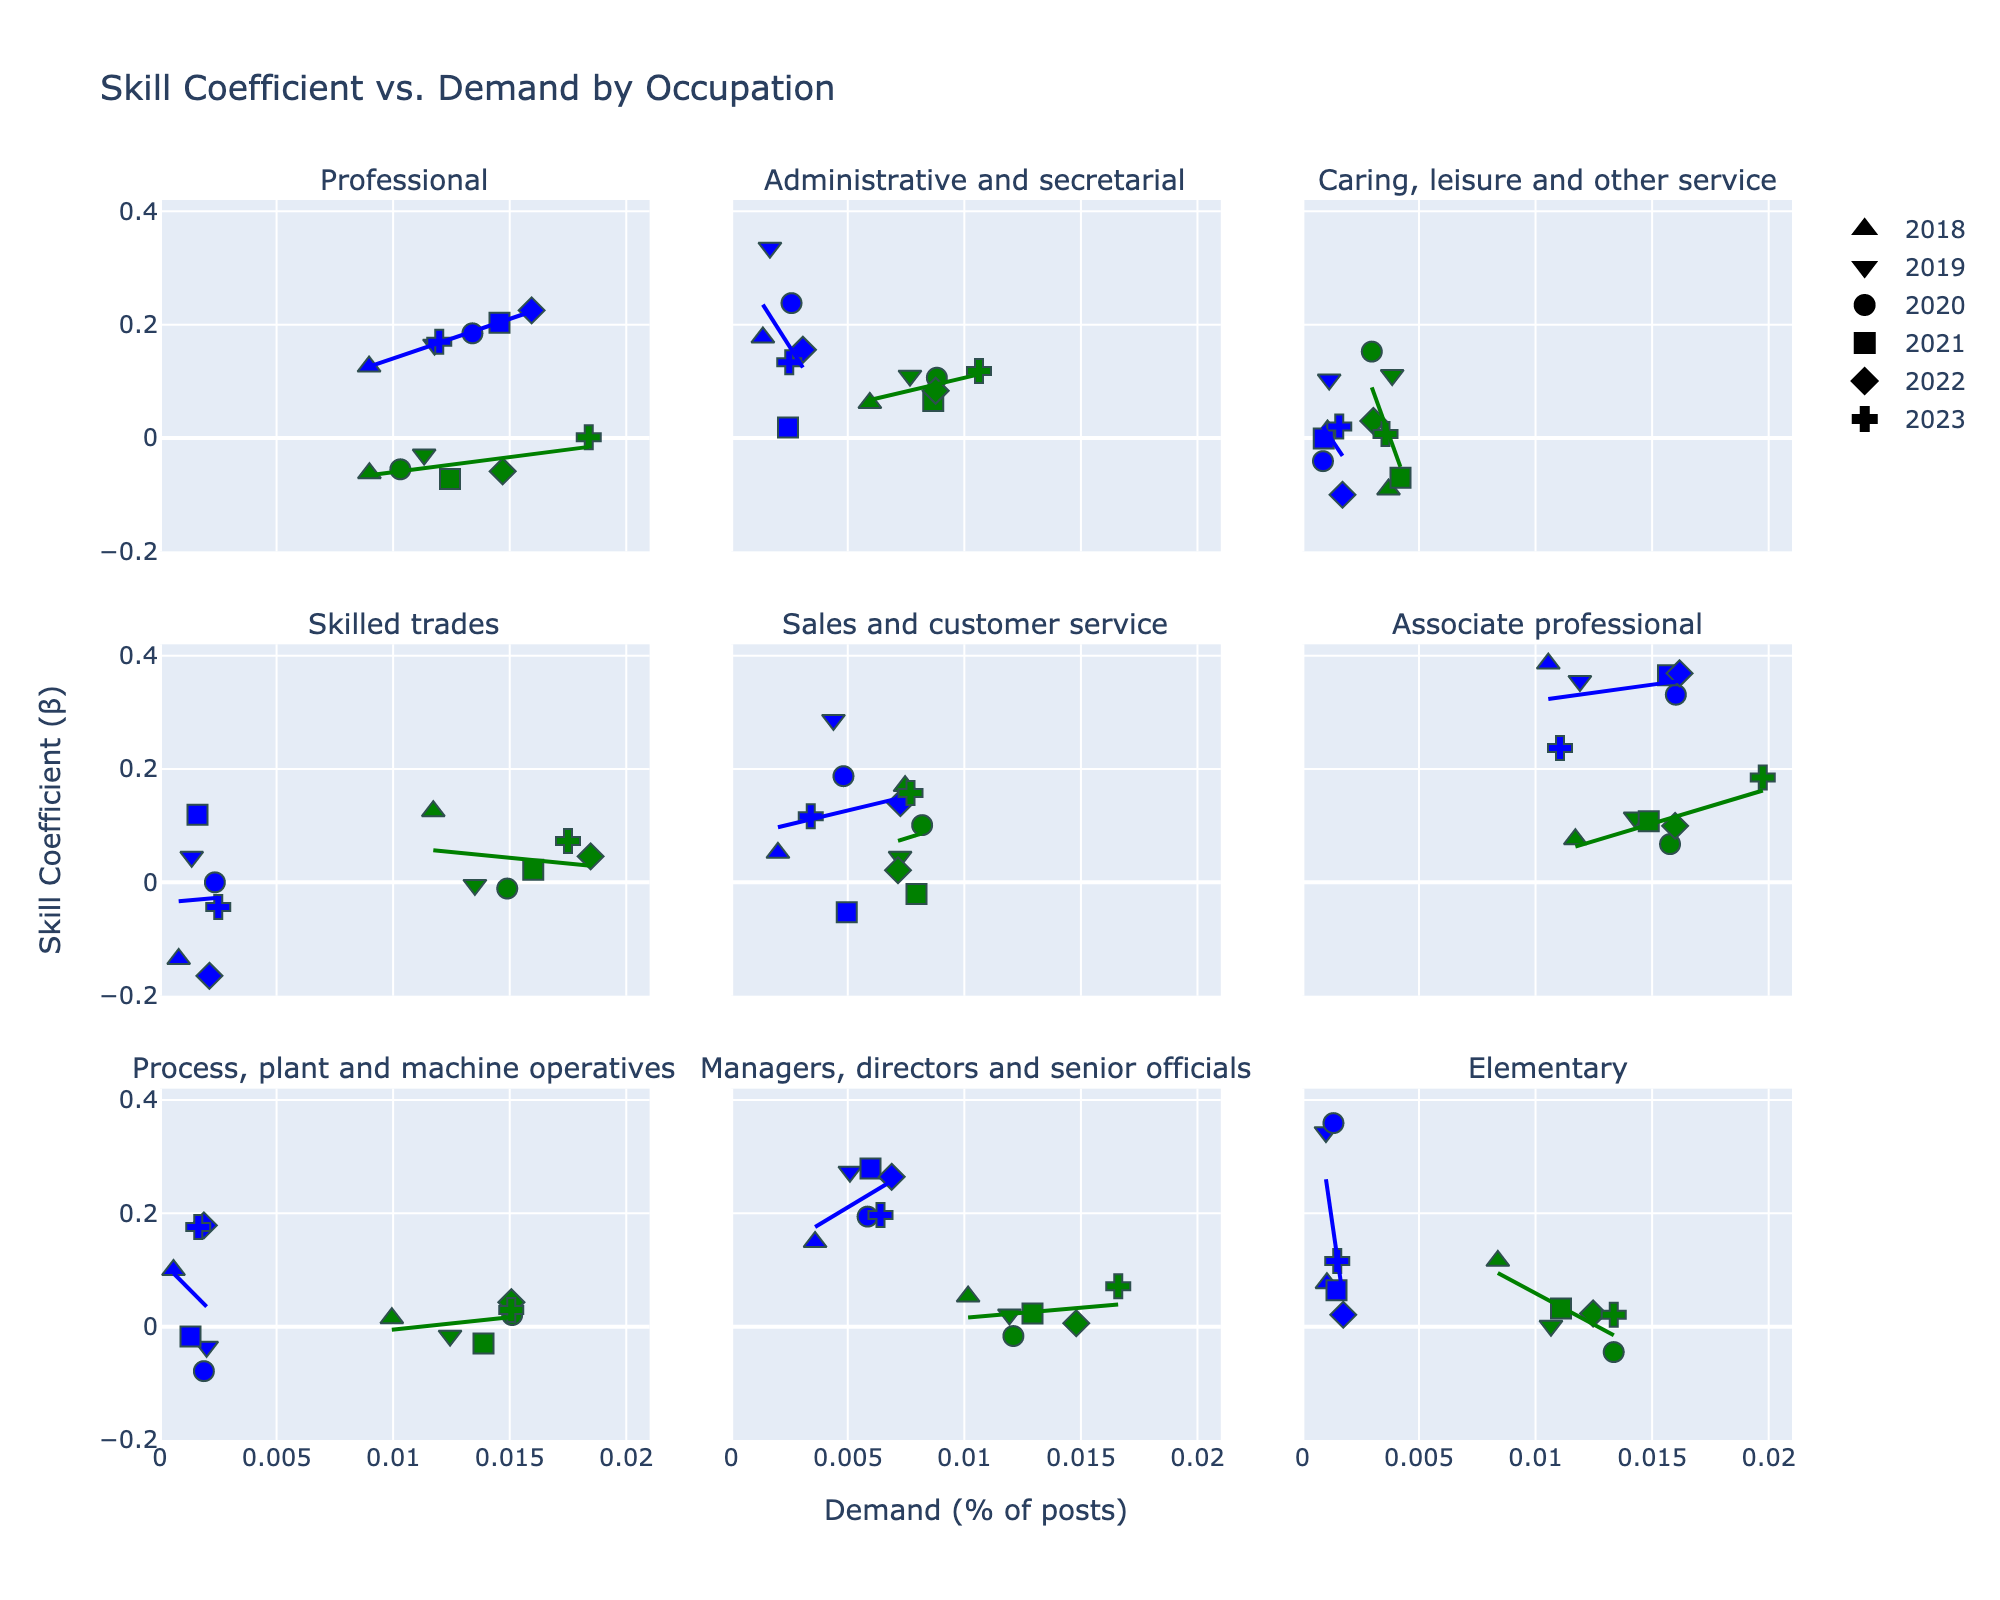

In [641]:
ai_coef_df = pd.DataFrame(ai_coef_rows)
green_coef_df = pd.DataFrame(green_coef_rows)
coef_df = pd.concat([ai_coef_df, green_coef_df])

def display_coef_scatter(df, occupation, group_colors, fig, row, col):

    year_marker_symbols = {
        2018: "triangle-up",
        2019: "triangle-down",
        2020: "circle",
        2021: "square",
        2022: "diamond",
        2023: "cross"
    }

    df = df[df["OCCUPATION"] == occupation].copy()
    df.sort_values(["GROUP", "YEAR"], inplace=True)

    # Loop over each unique group
    for group in df["GROUP"].unique():
        group_data = df[df["GROUP"] == group]
        for year in group_data["YEAR"].unique():
            year_data = group_data[group_data["YEAR"] == year]
            fig.add_trace(
                go.Scatter(
                    x=year_data["DEMAND"], 
                    y=year_data["SKILL_COEF"], 
                    mode='markers', 
                    showlegend=False,
                    marker=dict(
                        size=10,
                        color=group_colors[group],
                        symbol=year_marker_symbols[year],
                        line=dict(
                            width=1,
                            color='DarkSlateGrey'
                        )
                    )
                ), row=row, col=col
            )

        # Calculate the line of best fit (linear regression)
        x = group_data["DEMAND"]
        y = group_data["SKILL_COEF"]

        # Perform linear regression
        slope, intercept = np.polyfit(x, y, 1)

        # Create line values for the best fit
        line_x = np.array([min(x), max(x)])
        line_y = intercept + slope * line_x

        # Add the best fit line to the plot
        fig.add_trace(
            go.Scatter(
                x=line_x, 
                y=line_y, 
                mode='lines', 
                name=f'{group} Best Fit',
                showlegend=False,
                line=dict(
                    color=group_colors[group],
                    width=2,
                )
            ), row=row, col=col
        )

    # Add invisible traces for the legend (with black markers)
    if row == 1 and col == 1:
        for year in df["YEAR"].unique():
            fig.add_trace(
                go.Scatter(
                    x=[None],  # Invisible point
                    y=[None],  # Invisible point
                    mode='markers', 
                    name=str(year),
                    marker=dict(
                        size=10,
                        color='black',  # Black marker for legend
                        symbol=year_marker_symbols[year],
                        line=dict(
                            width=1,
                            color='black'
                        )
                    ),
                    showlegend=True  # Only show in the legend
                ), row=row, col=col
            )

    fig.update_xaxes(range=[0,.021], row=row, col=col, title_text="Demand (% of posts)" if row == 3 and col == 2 else "")
    fig.update_yaxes(range=[-0.2, 0.42], row=row, col=col, title_text="Skill Coefficient (β)" if row == 2 and col == 1 else "")

    return fig

def create_coef_scatter_subplot(df, title, filename, group_colors):
    
    occupations = df["OCCUPATION"].unique()
    
    fig = make_subplots(
        rows=3, cols=3,
        subplot_titles=[re.sub(" occupations", "", occ) for occ in occupations],
        horizontal_spacing=0.05,
        vertical_spacing=0.075,
        shared_xaxes=True,
        shared_yaxes=True
    )
    
    
    for i, occ in enumerate(occupations):
        row=(i // 3) + 1
        col=(i % 3) + 1
        display_coef_scatter(df, occ, group_colors, fig, row, col)
        
    fig.update_layout(
        title="Skill Coefficient vs. Demand by Occupation",
        width=1000, height=800,
    )
    
    fig.update_annotations(font_size=14)
    
    with open(f"figures/{filename}.png", "wb") as f:
        f.write(fig.to_image(format="png", engine="kaleido", scale=2))
    
    display(IPImage(filename=f"figures/{filename}.png", width=800, height=800))

create_coef_scatter_subplot(coef_df, "Skill Coefficient vs. Demand by Occupation", "coef_scatter", group_colors)

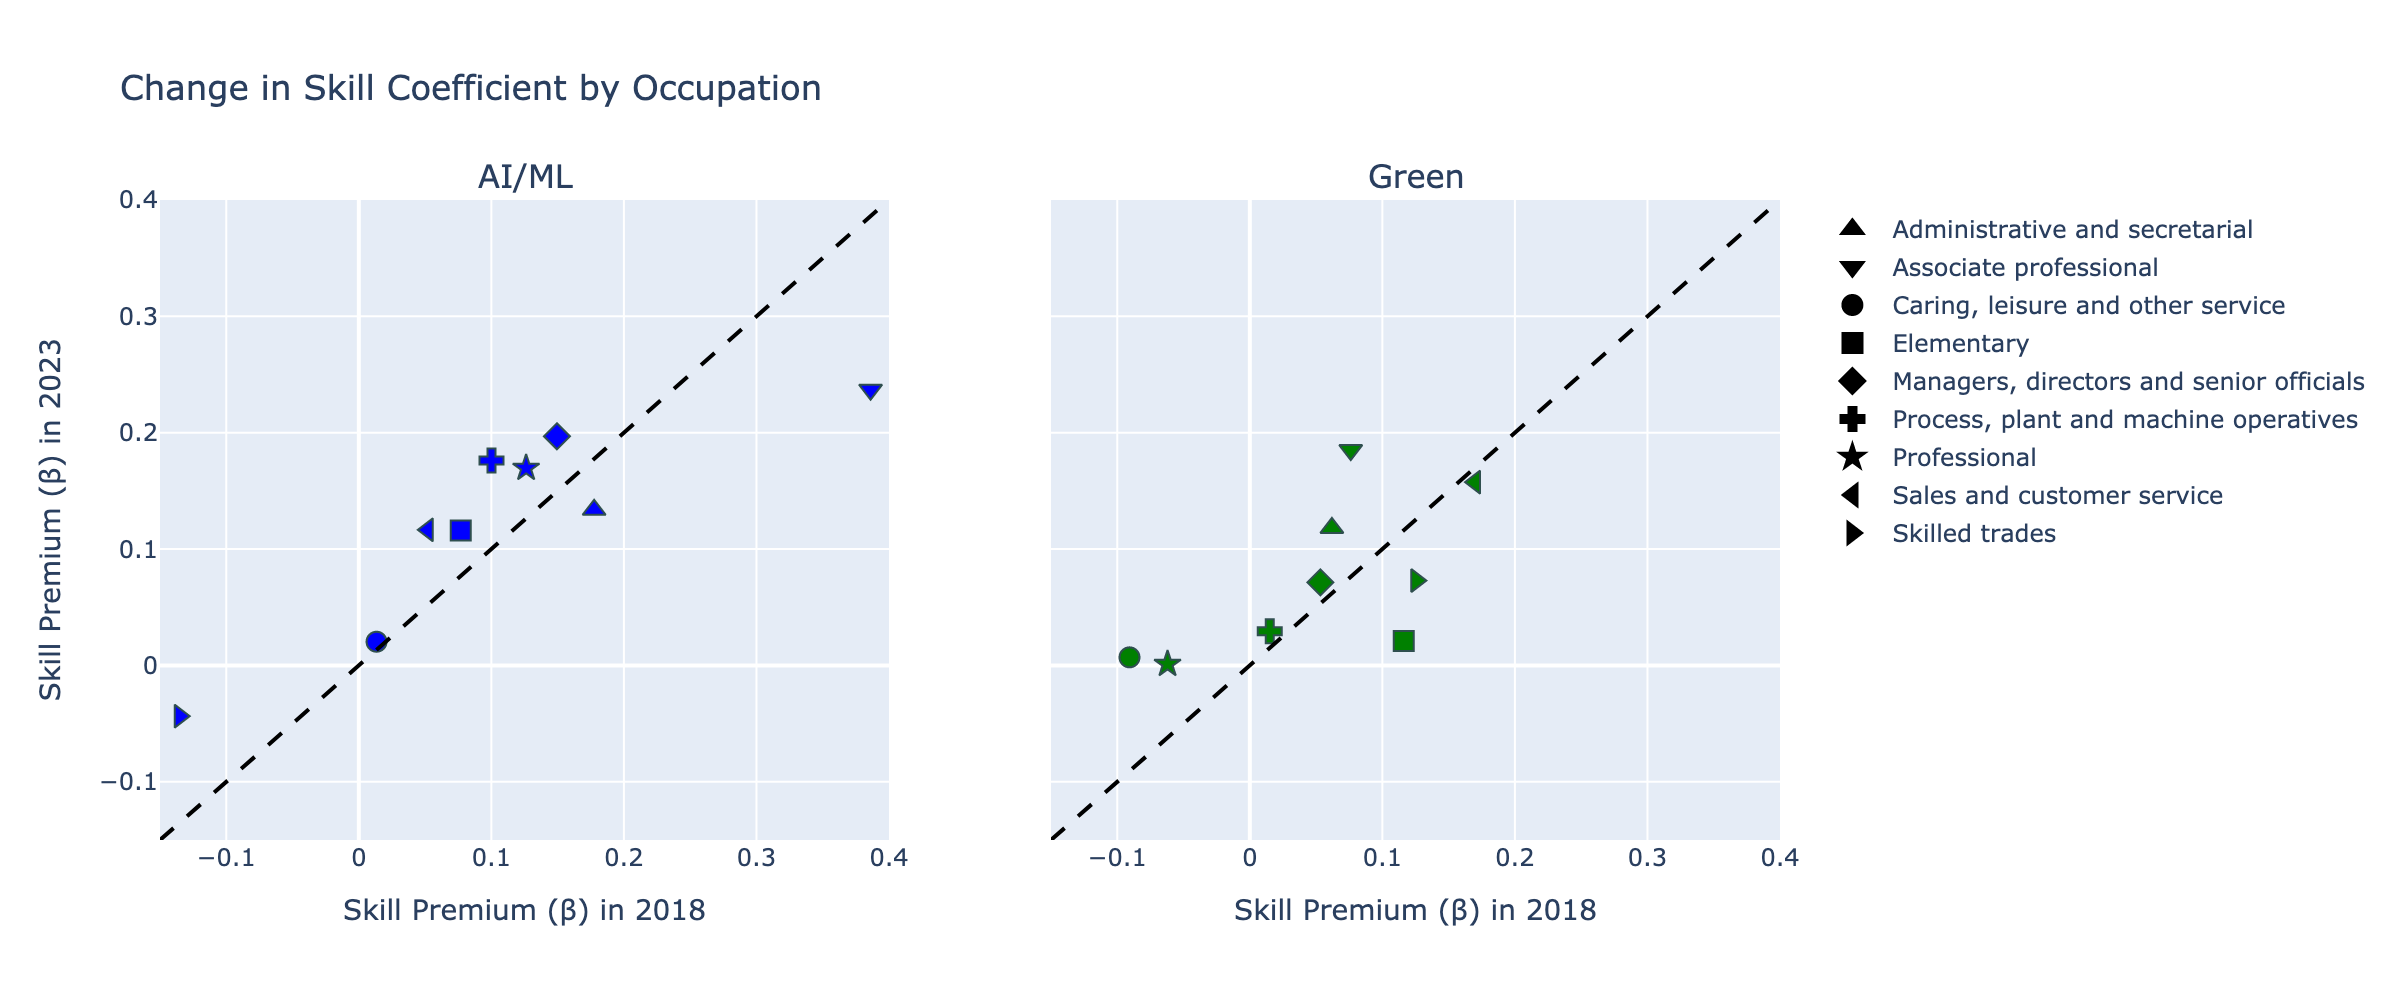

In [642]:
coef_df2 = coef_df.pivot_table(index="OCCUPATION", columns=["GROUP", "YEAR"], values="SKILL_COEF").reset_index()
coef_df2.columns = ["OCCUPATION", "AI_2018", "AI_2019", "AI_2020", "AI_2021", "AI_2022", "AI_2023", "GREEN_2018", "GREEN_2019", "GREEN_2020", "GREEN_2021", "GREEN_2022", "GREEN_2023"]

def create_coef_change(df, group, start, end, title, filename, group_colors, fig, row, col, show_legend):

    group_label = "AI" if group == "AI/ML" else "GREEN"
    
    occ_symbols = {
        "Administrative and secretarial occupations": "triangle-up",
        "Associate professional occupations": "triangle-down",
        "Caring, leisure and other service occupations": "circle",
        "Elementary occupations": "square",
        "Managers, directors and senior officials": "diamond",
        "Process, plant and machine operatives": "cross",
        "Professional occupations": "star",
        "Sales and customer service occupations": "triangle-left",
        "Skilled trades occupations": "triangle-right"
    }
    
    
    fig.add_trace(
        go.Scatter(
            x = df[f"{group_label}_{start}"],
            y = df[f"{group_label}_{end}"],
            mode='markers',
            showlegend=False,
            marker=dict(
                size=10,
                color=group_colors[group],
                line=dict(
                    width=1,
                    color='DarkSlateGrey'
                ),
                symbol=[occ_symbols[occ] for occ in df["OCCUPATION"]]
            )
        ), row=row, col=col
    )
    
    # Add the 45-degree line
    fig.add_trace(
        go.Scatter(
            x=[-.15, .4],
            y=[-.15, .4],
            mode='lines',
            showlegend=False,
            line=dict(
                color='black',
                width=2,
                dash='dash'
            )
        ), row=row, col=col
    )
    
    # add invisible trace with black markers for legend
    for occ, symbol in occ_symbols.items():
        fig.add_trace(
            go.Scatter(
                x=[None],  # Invisible point
                y=[None],  # Invisible point
                mode='markers', 
                name=re.sub(" occupations", "", occ),
                marker=dict(
                    size=10,
                    color='black',  # Black marker for legend
                    symbol=symbol,
                    line=dict(
                        width=1,
                        color='black'
                    )
                ),
                showlegend=show_legend  # Only show in the legend
            ), row=row, col=col
        )

    fig.update_xaxes(range=[-.15, .4], row=row, col=col, title_text=f'Skill Premium (β) in {start}')
    fig.update_yaxes(range=[-.15, .4], row=row, col=col, title_text=f'Skill Premium (β) in {end}' if col == 1 else "")

def display_coef_change_subplot(df, start, end, title, filename, group_colors):

    fig = make_subplots(
        rows=1, cols=2,
        subplot_titles=["AI/ML", "Green"],
        shared_xaxes=True,
        shared_yaxes=True
    )

    create_coef_change(df, "AI/ML", start, end, "AI/ML", "ai_skill_coef_change", group_colors, fig, 1, 1, False)
    create_coef_change(df, "Green", start, end, "Green", "green_skill_coef_change", group_colors, fig, 1, 2, True)

    fig.update_layout(
        title=title,
        width=1200, height=500,
    )

    with open(f"figures/{filename}.png", "wb") as f:
        f.write(fig.to_image(format="png", engine="kaleido", scale=2))
        
    display(IPImage(filename=f"figures/{filename}.png", width=1000, height=500))
    
display_coef_change_subplot(coef_df2, 2018, 2023, "Change in Skill Coefficient by Occupation", "skill_coef_change", group_colors)

# Skill Coefficient OLS

In [668]:
def get_sub_ols_coef(df, group, occ, year):
    
    skill = "AI" if group == "AI/ML" else "GREEN"
    equation = f"LOG_SALARY ~ {skill} + C(EDULEVELS_NAME_MIN, levels=edu_levels) + MIN_YEARS_EXPERIENCE + UK_SIC_1_NAME + NUTS1_NAME"
    df = df[(df["YEAR"] == year) & (df["SOC_2_NAME"] == occ)]
    
    ols = smf.ols(equation, data=df).fit()
    
    # get skill coefficient
    skill_coef = ols.params[skill]
    
    # get demand
    demand = len(df[df[skill] == 1]) / len(df)
    
    return float(skill_coef), demand, len(df)

ai_coef_rows = []
for occ in tqdm(reg_df["SOC_2_NAME"].unique()):
    if occ == "NULL": continue
    for year in reg_df["YEAR"].unique():
        coef, demand, count = get_sub_ols_coef(reg_df, "AI/ML", occ, year)
        ai_coef_rows.append(
            {
                "GROUP": "AI/ML",
                "OCCUPATION": occ,
                "YEAR": year,
                "SKILL_COEF": coef,
                "DEMAND": demand,
                "LOG_COUNT": np.log(count)
            }
        )
        
green_coef_rows = []
for occ in tqdm(reg_df["SOC_2_NAME"].unique()):
    if occ == "NULL": continue
    for year in reg_df["YEAR"].unique():
        coef, demand, count = get_sub_ols_coef(reg_df, "Green", occ, year)
        green_coef_rows.append(
            {
                "GROUP": "Green",
                "OCCUPATION": occ,
                "YEAR": year,
                "SKILL_COEF": coef,
                "DEMAND": demand,
                "LOG_COUNT": np.log(count)
            }
        )

ai_coef_soc2_df = pd.DataFrame(ai_coef_rows)
green_coef_soc2_df = pd.DataFrame(green_coef_rows)

100%|██████████| 27/27 [01:25<00:00,  3.16s/it]


In [671]:
print("AI/ML Skill Coefficient OLS")
smf.ols("SKILL_COEF ~ YEAR + C(OCCUPATION) + LOG_COUNT + DEMAND", data=ai_coef_soc2_df).fit().summary()

AI/ML Skill Coefficient OLS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SKILL_COEF   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     2.797
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           5.01e-05
Time:                        09:11:42   Log-Likelihood:                 65.296
No. Observations:                 156   AIC:                            -72.59
Df Residuals:                     127   BIC:                             15.85
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      -24.2678     24.718     -0.982      0.328     -73.181      24.645
C(OCCUPATION)[T.Business and public service associate professionals]             0.0284      0.200      0.142      0.887      -0.367       0.424
C(OCCUPATION)[T.Business, media and public service professionals]               -0.0869      0.132     -0.659      0.511      -0.348       0.174
C(OCCUPATION)[T.Caring personal service occupations]                            -0.2236      0.105     -2.128      0.035      -0.432      -0.016
C(OCCUPATION)[T.Community and civil enforcement occupations]                    -0.6983      0.376     -1.859      0.065      -1.442       0.045
C(OCCUPATION)[T.Corporate managers and directors]                               -0.0488      0.113     -0.433      0.666      -0.272       0.175
C(OCCUPATION)[T.Culture, media and sports occupations]                          -0.3427      0.153     -2.239      0.027      -0.646      -0.040
C(OCCUPATION)[T.Customer service occupations]                                   -0.2467      0.127     -1.945      0.054      -0.498       0.004
C(OCCUPATION)[T.Elementary administration and service occupations]              -0.0466      0.103     -0.450      0.653      -0.251       0.158
C(OCCUPATION)[T.Elementary trades and related occupations]                      -0.4451      0.175     -2.537      0.012      -0.792      -0.098
C(OCCUPATION)[T.Health and social care associate professionals]                 -0.2287      0.127     -1.804      0.074      -0.480       0.022
C(OCCUPATION)[T.Health professionals]                                           -0.2501      0.103     -2.423      0.017      -0.454      -0.046
C(OCCUPATION)[T.Leisure, travel and related personal service occupations]       -0.4473      0.170     -2.628      0.010      -0.784      -0.110
C(OCCUPATION)[T.Other managers and proprietors]                                 -0.0563      0.113     -0.501      0.618      -0.279       0.166
C(OCCUPATION)[T.Process, plant and machine operatives]                          -0.1099      0.129     -0.855      0.394      -0.364       0.144
C(OCCUPATION)[T.Protective service occupations]                                 -0.4793      0.255     -1.878      0.063      -0.984       0.026
C(OCCUPATION)[T.Sales occupations]                                              -0.1538      0.108     -1.427      0.156      -0.367       0.059
C(OCCUPATION)[T.Science, engineering and technology associate professionals]     0.0080      0.144      0.056      0.956      -0.277       0.293
C(OCCUPATION)[T.Science, research, eng

In [672]:
print("Green Skill Coefficient OLS")
smf.ols("SKILL_COEF ~ YEAR + C(OCCUPATION) + LOG_COUNT + DEMAND", data=green_coef_soc2_df).fit().summary()

Green Skill Coefficient OLS


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SKILL_COEF   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     2.645
Date:                Mon, 23 Sep 2024   Prob (F-statistic):           0.000124
Time:                        09:11:42   Log-Likelihood:                 153.46
No. Observations:                 156   AIC:                            -248.9
Df Residuals:                     127   BIC:                            -160.5
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================================================================================
                                                                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                       26.4104     12.934      2.042      0.043       0.817      52.004
C(OCCUPATION)[T.Business and public service associate professionals]             0.0058      0.061      0.095      0.925      -0.115       0.127
C(OCCUPATION)[T.Business, media and public service professionals]               -0.1207      0.061     -1.980      0.050      -0.241    -8.1e-05
C(OCCUPATION)[T.Caring personal service occupations]                             0.0036      0.060      0.060      0.952      -0.115       0.123
C(OCCUPATION)[T.Community and civil enforcement occupations]                     0.2721      0.207      1.317      0.190      -0.137       0.681
C(OCCUPATION)[T.Corporate managers and directors]                               -0.0514      0.058     -0.885      0.378      -0.166       0.064
C(OCCUPATION)[T.Culture, media and sports occupations]                           0.1458      0.088      1.661      0.099      -0.028       0.320
C(OCCUPATION)[T.Customer service occupations]                                   -0.0165      0.072     -0.229      0.819      -0.159       0.126
C(OCCUPATION)[T.Elementary administration and service occupations]              -0.0330      0.058     -0.565      0.573      -0.148       0.082
C(OCCUPATION)[T.Elementary trades and related occupations]                       0.1127      0.098      1.149      0.253      -0.081       0.307
C(OCCUPATION)[T.Health and social care associate professionals]                  0.0272      0.073      0.373      0.710      -0.117       0.171
C(OCCUPATION)[T.Health professionals]                                           -0.1975      0.060     -3.299      0.001      -0.316      -0.079
C(OCCUPATION)[T.Leisure, travel and related personal service occupations]        0.0254      0.095      0.269      0.789      -0.162       0.213
C(OCCUPATION)[T.Other managers and proprietors]                                 -0.0207      0.064     -0.323      0.747      -0.148       0.106
C(OCCUPATION)[T.Process, plant and machine operatives]                           0.0905      0.072      1.254      0.212      -0.052       0.233
C(OCCUPATION)[T.Protective service occupations]                                  0.2277      0.144      1.586      0.115      -0.056       0.512
C(OCCUPATION)[T.Sales occupations]                                               0.0554      0.059      0.939      0.350      -0.061       0.172
C(OCCUPATION)[T.Science, engineering and technology associate professionals]    -0.0451      0.062     -0.723      0.471      -0.168       0.078
C(OCCUPATION)[T.Science, research, eng